## Final Project Submission

Please fill out:
* Student name: Elizabeth Fawcett
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL: 


## Methodology

To evaluate the King's country dataset, I have chosen to use the following steps:
- Business Understanding
- Data Understanding and Data Prep
 - Obtain Data
 - Scrub Data
 - Explore Data
- Modeling
- Interpret
- Evaluation
- Deployment of Model

This is a combination of the OSEMN method explained at:[insert link here] and the CRISP-DM method explained at:[insert line here]. I found that the OSEMN method explained the data science process, but did not provide a framework for contextualization of the model or original data; whereas, the CRISP-DM method provided the business understanding and deployment steps to handle defining the scope of a project. I found the descriptors in the CRISP-DM method for projects did not specify obtaining or cleaning the data, which is where the OSEMN method shines. Both methods have strengths and weakness; as a result, I decided to pull the details from both to enrich my project building experience and to always keep the client in mind by expanding on the steps of both methodologies.

## Business Understanding

To develop an understanding of the nature of the business of the housing market, I'm referencing my own experience apartment shopping, the things I learned about what's important to me as a consumer of housing, an article written by one of the top real estate leaders in the northeast about common seller's questions, and the information provided in the dataset. 

In my own experience, when looking for an apartment, as a home buyer, I am looking for livability and the condition of the home. Will I need to invest to ensure that the place meets my personal standard? Do the features available meet my needs? For instance, in the past, a one bedroom apartment was sufficent. However, now I'm looking to use a bedroom as an office, so I am looking for two bedroom apartments, but one bathroom is still okay. To conclude, as a consumer I look at the quality of my investment and then determine if the space meets my needs.

From a real estate perspective, some of the most frequently asked questions by a home seller include the following. What does the market look like right now? At what point in the year should I sell? How can I improve my home to sell? What price should I set? What is the actual value of my home? insert [reference] here. It seems as if a seller is trying to pinpoint where they are on the sliding scale of value for their surrounding area, and maximizing profit based on this scale.

The data provides both categorical and continuous data points that fall into a few different categories. The continuous data deals with square footage, time, and location; whereas the categorical data includes aspects of the home that cannot change, one of which is whether or not the property is waterfront, and opinions about the home. This is a nice mixture of data that buyers and sellers would be interested in. There are some data points that include information about the surrounding neighborhood to develop the type of sliding scale of home value as well as the condition of the home and included features.

## Data Understanding and Data Prep

### Obtain Data

The dataset used for this exploration is located in this repository under the filename: kc_house_data.csv.

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# import data set from repository
import pandas as pd
df = pd.read_csv('kc_house_data.csv', index_col=0)
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
7129300520     1.0         NaN   0.0          3      7        1180   
6414100192     2.0         0.0   0.0          3      7        2170   
5631500400     1.0         0.0   0.0          3      6         770   
2487200875     1.0         0.0   0.0          5      7        1050   
1954400510     1.0         0.0   0.0          3      8        1680   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520           0.0      1955           0.0    98178  47.5112 -122.257   
6414100192         400.0      1951        1991.0    98125  47.7210 -122.319   
5631500400           0.0      1933           NaN    98028  47.7379 -122.233   
2487200875         910.0      1965           0.0    98136  47.5208 -122.393   
1954400510           0.0      1987           0.0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

Primary observations about the data in this king county housing data include:
- There are n/a's in the data set
- Even though most of the data is numerical, a lot of the numbers are categorical, like number of bedrooms
- There's something funky going on with the column names
- The years in yr_renovated have floats, but they need to be integers, and this is the case with the floors column as well

### Scrub Data

The following scrubbing techniques were applied to the original data:
- Manage n/a data types
- Delete duplicate rows
- Sort into categorical and continuous data
- Correct data types

### Manage n/a data types

In [2]:
# categorical nans identification
print(len(df))
df.isna().sum()

21597


date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront column is missing a lot values, what percentage of the dataset do these missing values constitute? The view column is missing far less, but what percentage of the data does it represent? This data set answers how many views does the property have prior to selling, this could be useful information for the seller in changing their price point as number of views increases.

In [3]:
# how much of the data is missing?
print('% of waterfront missing data: ' + str(df['waterfront'].isna().sum() / len(df['waterfront'])))
print('% of view missing data: ' + str(df['view'].isna().sum() / len(df['view'])))
print('% of yr_renovated data: ' + str(df['yr_renovated'].isna().sum() / len(df['yr_renovated'])))

% of waterfront missing data: 0.11001527989998611
% of view missing data: 0.0029170718155299346
% of yr_renovated data: 0.17789507802009538


Since the missing waterfront and yr_renovated data is more than 10% of the dataset, I'll create a new category 'unknown'.  Since the missing view data is less than 1% of the dataset, I'll remove those rows.

In [4]:
# managing categorical nans
# fill waterfront nans with unknown
waterfront_clean = pd.DataFrame(df.loc[:,'waterfront']).fillna(value='unknown')
yr_renovated_clean = pd.DataFrame(df.loc[:,'yr_renovated']).fillna(value='unknown')
df_clean = df.drop(labels='waterfront', axis=1)
df_clean = df.drop(labels='yr_renovated', axis=1)
df_clean = pd.merge(df_clean, waterfront_clean, left_index=True, right_index=True)
df_clean = pd.merge(df_clean, yr_renovated_clean, left_index=True, right_index=True)
# df_clean.head()

# delete nans rows in view
df_clean = df_clean.dropna()
print(len(df_clean))
df_clean.isna().sum()

20095


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront_x     0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
waterfront_y     0
yr_renovated     0
dtype: int64

### Delete duplicate rows

In [5]:
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

duplicated rows: 774


In [6]:
df_clean.drop_duplicates(inplace=True)
print('duplicated rows: ' + str(df_clean.duplicated().sum()))
print(len(df_clean))
df_clean.head()

duplicated rows: 0
19321


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                         
1000102  4/22/2015  300000.0         6        3.0         2400      9373   
1000102  4/22/2015  300000.0         6        3.0         2400      9373   
1200021  8/11/2014  400000.0         3        1.0         1460     43000   
2800031   4/1/2015  235000.0         3        1.0         1430      7599   
3600057  3/19/2015  402500.0         4        2.0         1650      3504   

         floors  waterfront_x  view  condition     ...       sqft_above  \
id                                                 ...                    
1000102     2.0           0.0   0.0          3     ...             2400   
1000102     2.0           0.0   0.0          3     ...             2400   
1200021     1.0           0.0   0.0          3     ...             1460   
2800031     1.5           0.0   0.0          4     ...             1010   
3600057     1.0           0.0   0.0          3     ...              760   

         sqft_basement yr_built  zipcode      lat     long  sqft_living15  \
id                                                                          
1000102            0.0     1991    98002  47.3262 -122.214           2060   
1000102            0.0     1991    98002  47.3262 -122.214           2060   
1200021            0.0     1952    98166  47.4434 -122.347           2250   
2800031          420.0     1930    98168  47.4783 -122.265           1290   
3600057          890.0     1951    98144  47.5803 -122.294           1480   

         sqft_lot15  waterfront_y yr_renovated  
id                                              
1000102        7316       unknown            0  
1000102        7316             0            0  
1200021       20023             0            0  
2800031       10320             0            0  
3600057        3504             0         2013  

[5 rows x 21 columns]

### Sort into categorical and continuous data

In [7]:
categorical = df_clean.loc[:,['zipcode', 'yr_built','bedrooms', 'bathrooms', 'floors', 'waterfront', 'yr_renovated', 'view', 'condition', 'grade']]
# categorical.head()
continuous = df_clean.loc[:, ['lat', 'long', 'sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'date', 'sqft_living15', 'sqft_lot15']]
# continuous.head()
target = pd.DataFrame(df_clean.loc[:, 'price'])
# target.head()

/Users/student/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### Correct data types

In [8]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19321 entries, 1000102 to 9900000190
Data columns (total 10 columns):
zipcode         19321 non-null int64
yr_built        19321 non-null int64
bedrooms        19321 non-null int64
bathrooms       19321 non-null float64
floors          19321 non-null float64
waterfront      0 non-null float64
yr_renovated    19321 non-null object
view            19321 non-null float64
condition       19321 non-null int64
grade           19321 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


What do the values look like in each of these categories?

In [9]:
print(categorical.zipcode.unique())
print(categorical.yr_built.unique())
print(categorical.bedrooms.unique())
print(categorical.bathrooms.unique())
print(categorical.floors.unique())
print(categorical.waterfront.unique())
print(categorical.yr_renovated.unique())
print(categorical.view.unique())
print(categorical.condition.unique())
print(categorical.grade.unique())

[98002 98166 98168 98144 98108 98032 98055 98118 98122 98115 98007 98034
 98052 98042 98040 98136 98126 98146 98188 98059 98109 98116 98103 98006
 98075 98024 98155 98003 98023 98117 98177 98019 98028 98092 98022 98070
 98038 98107 98106 98065 98072 98077 98133 98001 98178 98045 98033 98011
 98053 98014 98008 98031 98004 98074 98056 98199 98030 98027 98029 98058
 98010 98005 98198 98148 98125 98105 98102 98112 98119 98039]
[1991 1952 1930 1951 2005 1945 1924 1925 1902 2014 1901 1941 1998 1994
 1993 1997 1995 2003 1913 1907 1915 1908 1985 1918 1921 1949 1914 1975
 1978 1958 1956 1959 1960 1955 2013 1942 1950 1929 2001 1928 1966 1965
 2012 1920 2008 1983 1962 2004 2007 1963 1988 1912 1947 1999 1968 2002
 2006 2010 2009 1976 1946 1981 1984 1986 1987 1989 1990 1948 1979 1980
 1937 1970 1927 1940 1923 1909 1996 1916 1943 2000 1971 1934 1939 1977
 1974 1911 1961 1954 1967 1922 1910 2011 1957 1944 1931 1905 1936 1992
 1964 1919 1973 1903 1982 1926 1972 1953 1969 2015 1904 1932 1900 1933
 1906

The output above for zipcode, yr_built, and bedrooms look good, and as expected.
The output for bathrooms looks strange, it's a float64, but some of the values are whole numbers, change the values here to have 2 decimal places.
The output for floors is similar to bathrooms, change the values to have one decimal place.
View needs to be changed to an int64 value.
Condition and grade look good and as expected.

Since waterfront and yr_renovated are already objects, chaning their number formatting needs to happen while categorizing.
Waterfront doesn't need decimal places at all, change to an int64.
Yr_renovated doesn't need decimal places either.

In [10]:
# bathrooms update for all values to have decimal places
bathrooms_clean = pd.DataFrame(categorical.bathrooms.astype(str))
categorical = categorical.drop(labels='bathrooms', axis=1)
categorical = pd.merge(categorical, bathrooms_clean, how='outer', left_index=True, right_index=True)
new_columns = ['zipcode', 'yr_built', 'bedrooms', 'floors', 'waterfront', 'yr_renovated', 'view', 'condition', 'grade', 'bathrooms']
categorical.columns = new_columns
print(categorical.info())
print(categorical.bathrooms.unique())
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20281 entries, 1000102 to 9900000190
Data columns (total 10 columns):
zipcode         20281 non-null int64
yr_built        20281 non-null int64
bedrooms        20281 non-null int64
floors          20281 non-null float64
waterfront      0 non-null float64
yr_renovated    20281 non-null object
view            20281 non-null float64
condition       20281 non-null int64
grade           20281 non-null int64
bathrooms       20281 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 1.7+ MB
None
['3.0' '1.0' '2.0' '2.5' '2.25' '3.25' '3.5' '2.75' '1.75' '1.5' '4.5'
 '0.75' '4.0' '5.0' '3.75' '5.25' '4.25' '7.5' '5.5' '6.0' '1.25' '4.75'
 '8.0' '6.75' '6.25' '5.75' '6.5' '0.5' '7.75']
duplicated rows: 0


In [16]:
# floors update for all values to have decimal places
floors_clean = pd.DataFrame(categorical.floors.astype(str))
categorical = categorical.drop(labels='floors', axis=1)
categorical = pd.merge(categorical, floors_clean, how='left', left_index=True, right_index=True)
new_columns = ['zipcode', 'yr_built', 'bedrooms', 'waterfront', 'yr_renovated', 'view', 'condition', 'grade', 'bathrooms', 'floors']
categorical.columns = new_columns
print(categorical.info())
print(categorical.floors.unique())
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39145 entries, 1000102 to 9900000190
Data columns (total 10 columns):
zipcode         39145 non-null int64
yr_built        39145 non-null int64
bedrooms        39145 non-null int64
waterfront      0 non-null float64
yr_renovated    39145 non-null object
view            39145 non-null float64
condition       39145 non-null int64
grade           39145 non-null int64
bathrooms       39145 non-null object
floors          39145 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 3.3+ MB
None
['2.0' '1.0' '1.5' '3.0' '2.5' '3.5']
duplicated rows: 0


In [11]:
# waterfront update to int64 # needs to be done after conversion into categories?
waterfront_int = pd.DataFrame(categorical.waterfront.astype(int))
categorical = categorical.drop(labels='waterfront', axis=1)
categorical = pd.merge(categorical, waterfront_int, left_index=True, right_index=True)
new_columns = ['zipcode', 'yr_built', 'bedrooms', 'yr_renovated', 'view', 'condition', 'grade', 'bathrooms', 'floors', 'waterfront']
categorical.columns = new_columns
print(categorical.info())
print(categorical.waterfront.unique())

ValueError: Cannot convert non-finite values (NA or inf) to integer

#### Categorization time!

For each of the columns in the categorical dataframe, a change to categorical data is needed.

In [12]:
# zipcode categories
zip_cate = pd.DataFrame(categorical.loc[:,'zipcode'].astype('category'))
categorical = categorical.drop(labels='zipcode', axis=1)
categorical = pd.merge(categorical, zip_cate, left_index=True, right_index=True)
new_columns = ['yr_built', 'bedrooms', 'yr_renovated', 'view', 'condition', 'grade', 'bathrooms', 'floors', 'waterfront', 'zipcode']
categorical.columns = new_columns
print(categorical.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39145 entries, 1000102 to 9900000190
Data columns (total 10 columns):
yr_built        39145 non-null int64
bedrooms        39145 non-null int64
yr_renovated    39145 non-null float64
view            0 non-null float64
condition       39145 non-null object
grade           39145 non-null float64
bathrooms       39145 non-null int64
floors          39145 non-null int64
waterfront      39145 non-null object
zipcode         39145 non-null category
dtypes: category(1), float64(3), int64(4), object(2)
memory usage: 3.0+ MB
None


At this point, I realized my dataset was growing, but without duplicate rows. My method of updating column information isn't working. The cell above this one wouldn't run at all and was causing kernal crashes.
The first number of rows that I have is 21597. Then after cleaning the dataset 23553. Then 1794 duplicated rows were deleted. At this point, the 21759 number of rows is still greater than the beginning number of rows in the data set. This is a problem. After updated the datatype for the bathrooms columns, my number of rows is equal to 23633, another increase. After changing the floors column, I had 114317 rows. In the next datatype update to categories for the column of data 'zipcode', the kernal dies. It is at this point, I realized that my method of updating information in the data is not working. So we begin again, with importing.
# So we begin again.
## Data Understanding and Data Prep
### Import Data

In [1]:
# Your code here - remember to use markdown cells for comments as well!
# import data set from repository
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('Solarize_Light2')
!pip install folium
import folium
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import PowerTransformer

df = pd.read_csv('kc_house_data.csv', index_col=0)
df.head()
# df.index

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   
5631500400   2/25/2015  180000.0         2       1.00          770     10000   
2487200875   12/9/2014  604000.0         4       3.00         1960      5000   
1954400510   2/18/2015  510000.0         3       2.00         1680      8080   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
7129300520     1.0         NaN   0.0          3      7        1180   
6414100192     2.0         0.0   0.0          3      7        2170   
5631500400     1.0         0.0   0.0          3      6         770   
2487200875     1.0         0.0   0.0          5      7        1050   
1954400510     1.0         0.0   0.0          3      8        1680   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520           0.0      1955           0.0    98178  47.5112 -122.257   
6414100192         400.0      1951        1991.0    98125  47.7210 -122.319   
5631500400           0.0      1933           NaN    98028  47.7379 -122.233   
2487200875         910.0      1965           0.0    98136  47.5208 -122.393   
1954400510           0.0      1987           0.0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

In [2]:
# nans identification
print(len(df))
df.isna().sum()

21597


date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [3]:
# how much of the data is missing?
print('% of waterfront missing data: ' + str((df['waterfront'].isna().sum() / len(df['waterfront']))*100))
print('% of view missing data: ' + str((df['view'].isna().sum() / len(df['view']))*100))
print('% of yr_renovated data: ' + str((df['yr_renovated'].isna().sum() / len(df['yr_renovated']))*100))

% of waterfront missing data: 11.00152798999861
% of view missing data: 0.29170718155299347
% of yr_renovated data: 17.78950780200954


In [4]:
# i realized that a potential solution was to look at the descibe method
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19221.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      0.233863      3.409825      7.657915   
std        0.539683      0.086825      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

The following two cells will show a before and after of rewriting the nans portion of the code. I think the problem is with the type of merge that I'm doing, since the datasets are growing in length. So, I will simply and remove merging.

In [5]:
# before
# managing nans
# fill waterfront and yr_renovated nans with the integrer 0, as it is the mode for both sets of data
print(df.waterfront.mode())
print(df.yr_renovated.mode())
waterfront_clean = pd.DataFrame(df.loc[:,'waterfront']).fillna(value=0)
yr_renovated_clean = pd.DataFrame(df.loc[:,'yr_renovated']).fillna(value=0)
df_clean = df.drop(labels='waterfront', axis=1)
df_clean = df_clean.drop(labels='yr_renovated', axis=1)
df_clean = pd.merge(df_clean, waterfront_clean, left_index=True, right_index=True)
df_clean = pd.merge(df_clean, yr_renovated_clean, left_index=True, right_index=True)
# df_clean.head()

# delete nans rows in view
df_clean = df_clean.dropna()
print(len(df_clean))
df_clean.isna().sum()

0    0.0
dtype: float64
0    0.0
dtype: float64
22608


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
waterfront       0
yr_renovated     0
dtype: int64

In [6]:
# after
# managing nans
# fill waterfront and yr_renovated nans with the integrer 0, as it is the mode for both sets of data
print('waterfront mode: ' + str(df.waterfront.mode()))
print('yr_renovated mode: ' + str(df.yr_renovated.mode()))
df.loc[:,'waterfront'] = df.loc[:,'waterfront'].fillna(value=0)
# df.loc[:,'waterfront'].isna().sum() # uncomment to check efficacy
df.loc[:,'yr_renovated'] = df.loc[:,'yr_renovated'].fillna(value=0)
# df.loc[:,'yr_renovated'].isna().sum() # uncomment to check efficacy
# df.isna().sum() # uncomment to check entire df

# delete nans rows in view
df_clean = df.dropna()
# df_clean.isna().sum() #uncomment to check if nans were dropped
len(df_clean) # checking to ensure that the length of the dataset was reduced
# df_clean.head()

waterfront mode: 0    0.0
dtype: float64
yr_renovated mode: 0    0.0
dtype: float64


21534

### Duplicate Rows

This approach to managing nans appears to be more successful. Next, since I believe the issue was with merging, my duplicate rows code doesn't need to change. It is below.

In [7]:
print('duplicated rows: ' + str(df_clean.duplicated().sum()))

duplicated rows: 0


I wonder if in the prior iteration of this code, I was deleting duplicates from merging. I know that this same method did not work when I started to categorize some of the variable, so the troubleshooting continues.

### Sort into categorical and continuous data

This time, I am going to prove my assumptions for data type on histograms and scatterplots.

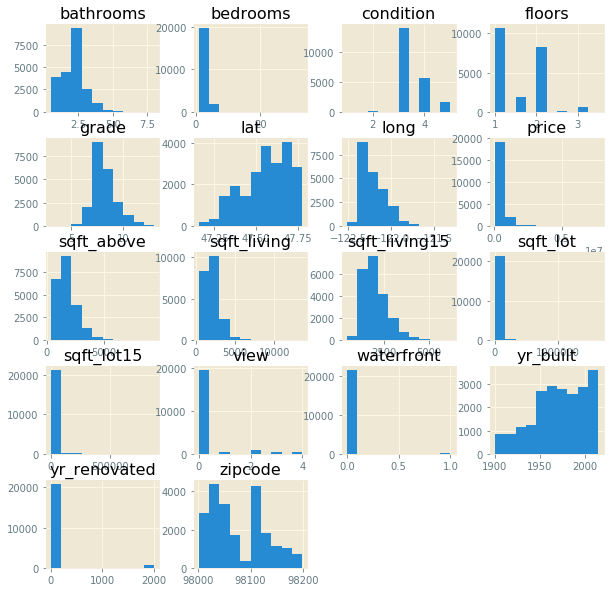

In [8]:
df_clean.hist(figsize=(10,10));

These initial histograms tell me that condition, floors, and view are for sure categorical. Now for the scatterplots.

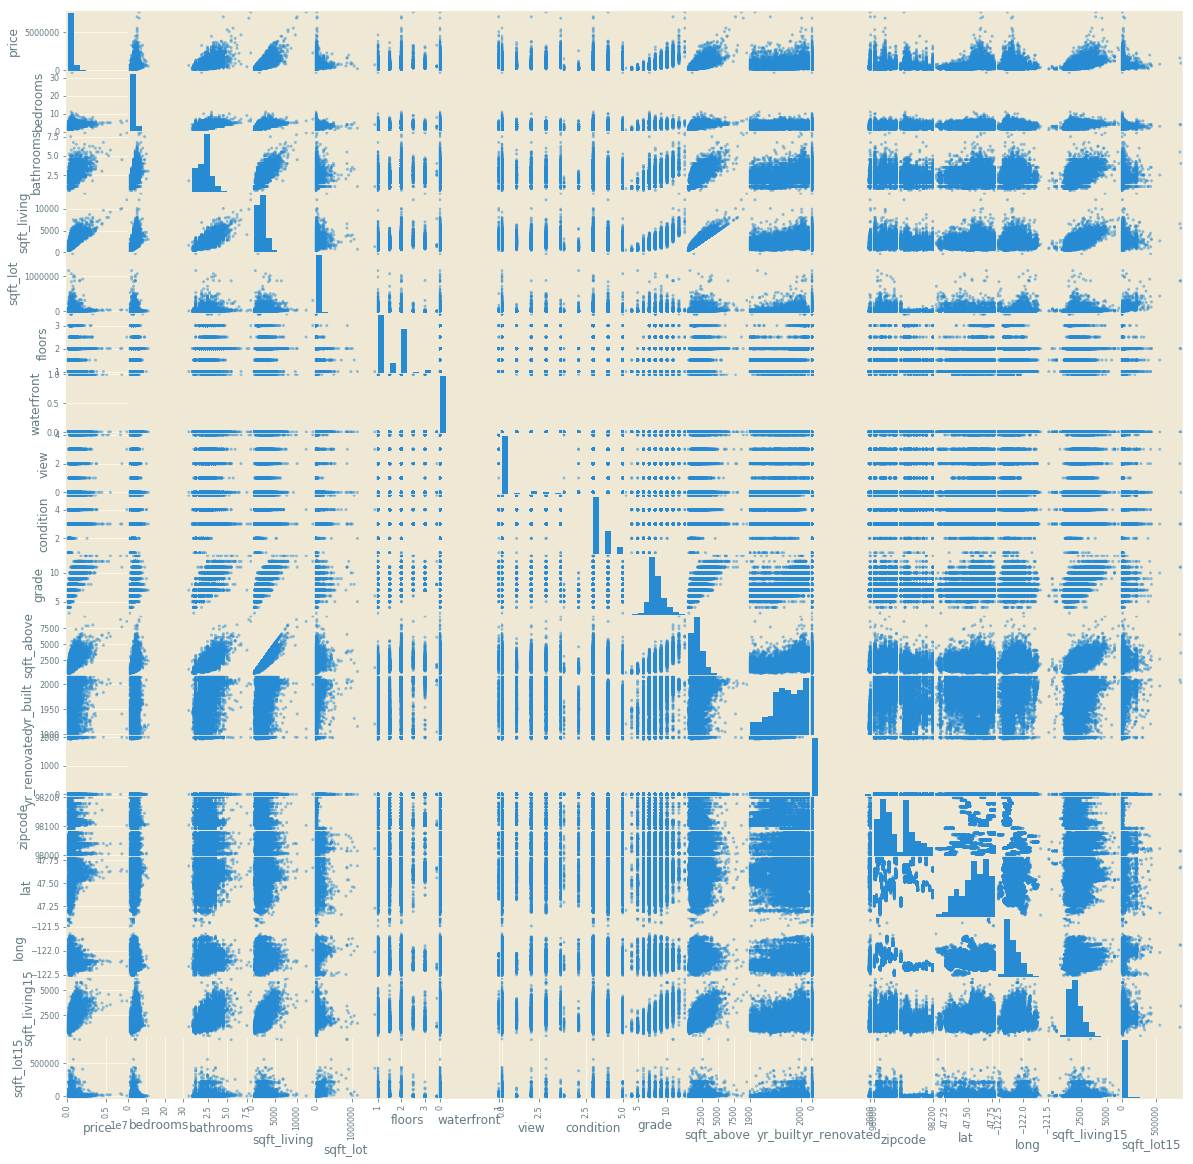

In [9]:
# scatter matrix to determine categorical data
pd.plotting.scatter_matrix(df_clean, figsize=(20,20));

Based on this information, floors, view, condition, grade, zipcode are definitately categorical variables. I would like to look at some of the other variables more closely, like the years and bedroom and bathrooms. It also looks like bedrooms has an outlier.

I should note that waterfront and yr_renovated are excluded from this matrix due to the data type being an object.

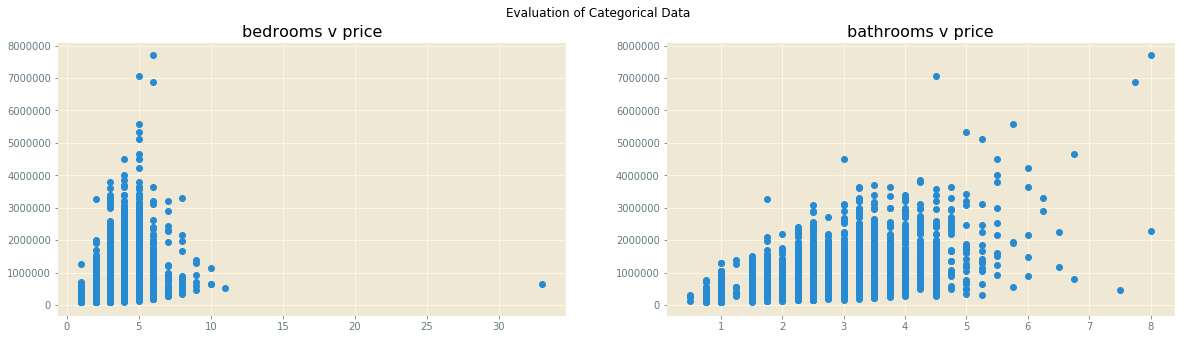

In [10]:
fig01 = plt.figure(figsize=(20,5))
fig01.suptitle('Evaluation of Categorical Data')
ax = fig01.add_subplot(121)
ax1 = ax.scatter(x=df_clean['bedrooms'], y=df_clean['price'])
ax1.axes.set_title('bedrooms v price')
ax = fig01.add_subplot(122)
ax2 = ax.scatter(x=df_clean['bathrooms'], y=df_clean['price'])
ax2.axes.set_title('bathrooms v price');

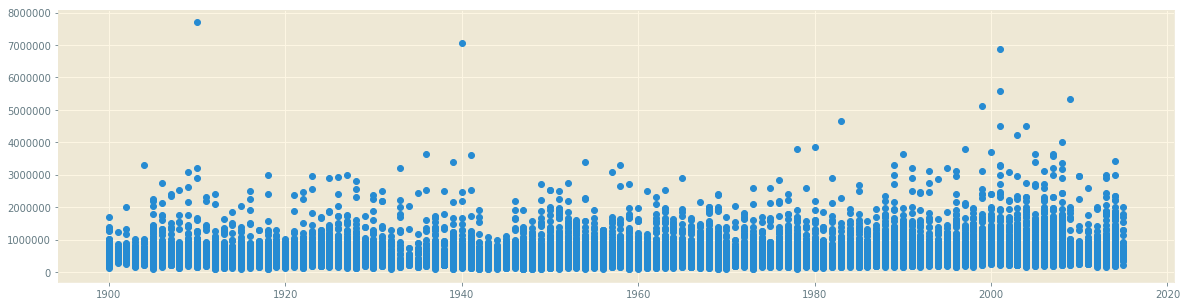

In [11]:
plt.figure(figsize=(20,5));
plt.scatter(x=df_clean['yr_built'], y=df_clean['price']);

This scatterplot shows that year is also a categorical value.

### Categorical and Continuous data seperation

In [12]:
categorical = df_clean.loc[:,['zipcode', 'yr_built','bedrooms',
                              'bathrooms', 'floors', 'waterfront', 'yr_renovated', 
                              'view', 'condition', 'grade']]
# categorical.head()
continuous = df_clean.loc[:, ['lat', 'long', 'sqft_lot', 'sqft_living', 'sqft_above', 
                              'sqft_basement', 'date', 'sqft_living15', 'sqft_lot15']]
# continuous.head()
target = pd.DataFrame(df_clean.loc[:, 'price'])
# target.index
# raw = [continuous, categorical, target]
# raw.index

# Model 1.0
Below is the model after nans have been managed and the categories have been sorted, let's see what the model picks up.

In [13]:
from statsmodels.formula.api import ols
raw_cat = categorical.reset_index()
raw_cont = continuous.reset_index()
raw_target = target.reset_index()

raw = [raw_cont, raw_cat, raw_target]
raw_df = pd.concat(raw, axis=1)
# print(raw_df.head())

outcome = 'price'
predictors = raw_df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=raw_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     86.70
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:42:01   Log-Likelihood:            -2.9188e+05
No. Observations:               21534   AIC:                         5.851e+05
Df Residuals:                   20846   BIC:                         5.906e+05
Df Model:                         687                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5.109e+06   2.83e+06      1.804      0.071   -4.43e+05    1.07e+07
sqft_basement[T.10.0]   -3.163e+04   1.42e+05     -0.223      0.823   -3.09e+05    2.46e+05
sqft_basement[T.100.0]    5.16e+04   2.96e+04      1.743      0.081   -6442.404     1.1e+05
sqft_basement[T.1000.0]  3.372e+04   2.54e+04      1.326      0.185   -1.61e+04    8.36e+04
sqft_basement[T.1008.0] -6623.2107   1.92e+05     -0.035      0.972   -3.82e+05    3.69e+05
sqft_basement[T.1010.0]   5.01e+04   3.14e+04      1.597      0.110   -1.14e+04    1.12e+05
sqft_basement[T.1020.0]  1.066e+05   3.36e+04      3.170      0.002    4.07e+04    1.73e+05
sqft_basement[T.1024.0] -6.873e+05   1.92e+05     -3.587      0.000   -1.06e+06   -3.12e+05
sqft_basement[T.1030.0]   1.15e+05   3.56e+04      3.231      0.001    4.53e+04    1.85e+05
sqft_basement[T.1040.0]  1.208e+04   3.31e+04      0.365      0.715   -5.28e+04     7.7e+04
sqft_basement[T.1050.0]  1.156e+05   3.69e+04      3.136      0.002    4.33e+04    1.88e+05
sqft_basement[T.1060.0] -7097.8166   3.28e+04     -0.216      0.829   -7.15e+04    5.73e+04
sqft_basement[T.1070.0]  1.689e+04   3.43e+04      0.492      0.623   -5.04e+04    8.41e+04
sqft_basement[T.1080.0]  1.779e+04   4.01e+04      0.443      0.658   -6.09e+04    9.65e+04
sqft_basement[T.1090.0]  6.531e+04   4.02e+04      1.624      0.104   -1.35e+04    1.44e+05
sqft_basement[T.110.0]   2.462e+04   4.51e+04      0.546      0.585   -6.37e+04    1.13e+05
sqft_basement[T.1100.0]  5.885e+04   3.08e+04      1.910      0.056   -1556.895    1.19e+05
sqft_basement[T.1110.0]  1.109e+05   3.91e+04      2.836      0.005    3.43e+04    1.88e+05
sqft_basement[T.1120.0]  7.585e+04    3.7e+04      2.048      0.041    3257.770    1.48e+05
sqft_basement[T.1130.0]  2.211e+04   4.15e+04      0.532      0.595   -5.93e+04    1.04e+05
sqft_basement[T.1135.0] -1.692e+05   1.92e+05     -0.881      0.378   -5.45e+05    2.07e+05
sqft_basement[T.1140.0]  1.294e+05   4.41e+04      2.935      0.003     4.3e+04    2.16e+05
sqft_basement[T.1150.0]  3.467e+04   4.33e+04      0.801      0.423   -5.02e+04     1.2e+05
sqft_basement[T.1160.0]  4.813e+04   4.42e+04      1.088      0.277   -3.86e+04    1.35e+05
sqft_basement[T.1170.0] -9817.0186   4.19e+04     -0.234      0.815    -9.2e+04    7.24e+04
sqft_basement[T.1180.0]  7.682e+04   4.31e+04      1.783      0.075   -7647.163    1.61e+05
sqft_basement[T.1190.0]  6801.1537   4.56e+04      0.149      0.882   -8.26e+04    9.62e+04
sqft_basement[T.120.0]   6.667e+04   2.67e+04      2.495      0.013    1.43e+04    1.19e+05
sqft_basement[T.1200.0]  3.903e+04   3.32e+04      1.175      0.240   -2.61e+04    1.04e+05
sqft_basement[T.1210.0] -3.819e+04    5.1e+04     -0.748      0.454   -1.38e+05    6.18e+04
sqft_basement[T.1220.0]  1.241e+05   4.21e+04  

The adjusted r-squared vales is 0.734, which is pretty good for a raw data set. Our goal is to reach 0.800, so we still have some cleaning work to do. The following variables are statistically significant (meaning their p-value is less than 0.05):
- sqft_basement = 1020, 1024, 1030, 1050, 1110, 1120, 1140, 120, 1220, 1260, 1270, 1280, 1284, 130, 1320, 1360, 1380, 1390, 140, 1430, 1450, 1490, 1520, 1560, 1570, 1590, 1600, 1620, 1630, 1650, 1660, 1710, 1760, 1780, 1790, 1800, 1816, 1820, 1860, 1870, 1880, 1890, 1913, 1920, 1940, 1950, 2020, 2170, 2196, 2200, 2220, 2240, 2310, 2350, 2360, 240, 2400, 2490, 2550, 2600, 2730, 280, 290, 300, 3000, 330, 3480, 3500, 360, 400, 4130, 417, 450, 4820, 560, 580, 710, 768, 80, 850, 875, 880, 946
 - Since, so many of these datapoints are significant, let's turn this into a categorical variable of basement/no basement
- date = 10/11/2014
 - This data doesn't seem to bring meaning, so let's drop it.
- yr_renovated = 1954, 1962, 1984, 1990, 1994, 1995, 1999, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2014
 - Since many of the years are 2000 are significant, let's set up a category with 2000 as the division. Something like renovated in the last 15 years.
- lat
- long
- sqft_lot
- sqft_living
- sqft_above
- sqft_living15
- sqft_lot15
- zipcode
- yr_built
- bedrooms
- bathrooms
- waterfront
- yr_renovated
- view
- condition
- grade

Let's remove all the data that is not statistically signifcant, and make other adjustments for sqft_basement and yr_renovated.

In [14]:
# print(categorical.columns)
# print(continuous.columns)
# print(target.columns)

# remove date
continuous_mod1 = continuous.drop('date', axis=1)
# remove floors
categorical_mod1 = categorical.drop('floors', axis=1)
# no change
target_mod1 = pd.DataFrame(target)

### Back to correcting data types

#### Categorical data

In [15]:
categorical_mod1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 9 columns):
zipcode         21534 non-null int64
yr_built        21534 non-null int64
bedrooms        21534 non-null int64
bathrooms       21534 non-null float64
waterfront      21534 non-null float64
yr_renovated    21534 non-null float64
view            21534 non-null float64
condition       21534 non-null int64
grade           21534 non-null int64
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


But what does the data look like in each of these cells?

In [16]:
print(categorical_mod1.zipcode.unique())
print(categorical_mod1.yr_built.unique())
print(categorical_mod1.bedrooms.unique())
print(categorical_mod1.bathrooms.unique())
print(categorical_mod1.waterfront.unique())
print(categorical_mod1.yr_renovated.unique())
print(categorical_mod1.view.unique())
print(categorical_mod1.condition.unique())
print(categorical_mod1.grade.unique())

[98178 98125 98028 98136 98074 98053 98003 98146 98038 98007 98115 98107
 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052 98027
 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008 98059
 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032 98045
 98102 98077 98198 98108 98168 98177 98029 98006 98109 98022 98033 98155
 98024 98011 98031 98106 98072 98188 98065 98014 98055 98039]
[1955 1951 1933 1965 1987 2001 1995 1960 2003 1942 1927 1977 1900 1979
 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929 1981
 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991 1954
 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988 1962
 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924 1990
 1914 1926 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943 1957 2004
 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1963 1998 1913 2013
 1907 1958 2012 1912 2011 1932 1944 1902 2009 1903 1970 2015 1934 1938
 1919

Last time, I tried to fix each output prior to categorizing each column of data. This time, I will categorize first.

In [17]:
# generating categories for each type of categorical data
zipcode = categorical_mod1['zipcode'].astype('category')
yr_built = categorical_mod1['yr_built'].astype('category')
bedrooms = categorical_mod1['bedrooms'].astype('category')
bathrooms = categorical_mod1['bathrooms'].astype('category')
waterfront = categorical_mod1['waterfront'].astype('category')
# yr_renovated = categorical_mod1['yr_renovated'].astype('category')
view = categorical_mod1['view'].astype('category')
condition = categorical_mod1['condition'].astype('category')
grade = categorical_mod1['grade'].astype('category')
bathrooms

id
7129300520    1.00
6414100192    2.25
5631500400    1.00
2487200875    3.00
1954400510    2.00
7237550310    4.50
1321400060    2.25
2414600126    1.00
3793500160    2.50
1736800520    2.50
9212900260    1.00
114101516     1.00
6054650070    1.75
1175000570    2.00
9297300055    3.00
1875500060    2.00
6865200140    1.00
16000397      1.00
7983200060    1.00
6300500875    1.75
2524049179    2.75
7137970340    2.50
8091400200    1.50
3814700200    2.25
1202000200    2.00
1794500383    1.75
3303700376    1.00
5101402488    1.75
1873100390    2.50
8562750320    2.50
              ... 
3052700432    2.25
2025049203    1.00
952006823     2.50
3832050760    2.50
2767604724    2.50
6632300207    2.50
2767600688    1.50
7570050450    2.50
7430200100    3.50
4140940150    2.75
1931300412    2.25
8672200110    3.75
5087900040    2.75
1972201967    2.25
7502800100    2.75
191100405     3.25
8956200760    2.50
7202300110    3.00
249000205     3.75
5100403806    2.50
844000965     1.75
785214004

It looks like in the categorization process that the data outputs fixed themselves, as in for bathrooms, what previously appeared at '3.' now appears as '3.00'.

In [18]:
# confirmed dtype change to categories
categorical_mod1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 9 columns):
zipcode         21534 non-null int64
yr_built        21534 non-null int64
bedrooms        21534 non-null int64
bathrooms       21534 non-null float64
waterfront      21534 non-null float64
yr_renovated    21534 non-null float64
view            21534 non-null float64
condition       21534 non-null int64
grade           21534 non-null int64
dtypes: float64(4), int64(5)
memory usage: 1.6 MB


Let's be sure to replace the old data with the new.

In [19]:
categorical_mod1['zipcode'] = categorical_mod1['zipcode'].astype('category')
categorical_mod1['yr_built'] = categorical_mod1['yr_built'].astype('category')
# categorical_mod1['bedrooms'] = categorical_mod1['bedrooms'].astype('category')
# this data will be changed into an ordered category later in the code
categorical_mod1['bathrooms'] = categorical_mod1['bathrooms'].astype('category')
categorical_mod1['waterfront'] = categorical_mod1['waterfront'].astype('category')
# categorical_mod1['yr_renovated'] = categorical_mod1['yr_renovated'].astype('category') 
# This data needs to be transformed prior to being set as a cateogory, 
# so this code will happen later after transformation.
categorical_mod1['view'] = categorical_mod1['view'].astype('category')
categorical_mod1['condition'] = categorical_mod1['condition'].astype('category')
categorical_mod1['grade'] = categorical_mod1['grade'].astype('category')
categorical_mod1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 9 columns):
zipcode         21534 non-null category
yr_built        21534 non-null category
bedrooms        21534 non-null int64
bathrooms       21534 non-null category
waterfront      21534 non-null category
yr_renovated    21534 non-null float64
view            21534 non-null category
condition       21534 non-null category
grade           21534 non-null category
dtypes: category(7), float64(1), int64(1)
memory usage: 663.2 KB


#### Continuous data

In [20]:
continuous_mod1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 8 columns):
lat              21534 non-null float64
long             21534 non-null float64
sqft_lot         21534 non-null int64
sqft_living      21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


I wonder why sqft_basement is an object?

## sqft_basement adjustment

In [21]:
# basement preview
continuous_mod1.sqft_basement

id
7129300520       0.0
6414100192     400.0
5631500400       0.0
2487200875     910.0
1954400510       0.0
7237550310    1530.0
1321400060         ?
2414600126     730.0
3793500160       0.0
1736800520    1700.0
9212900260     300.0
114101516        0.0
6054650070       0.0
1175000570       0.0
9297300055     970.0
1875500060       0.0
6865200140       0.0
16000397           ?
7983200060       0.0
6300500875     760.0
2524049179     720.0
7137970340       0.0
8091400200       0.0
3814700200       0.0
1202000200       0.0
1794500383     700.0
3303700376       0.0
5101402488     730.0
1873100390       0.0
8562750320       0.0
               ...  
3052700432     280.0
2025049203       0.0
952006823      320.0
3832050760       0.0
2767604724       0.0
6632300207       0.0
2767600688     190.0
7570050450       0.0
7430200100    1800.0
4140940150       0.0
1931300412       0.0
8672200110       0.0
5087900040       0.0
1972201967      50.0
7502800100       0.0
191100405          ?
8956200760

There's a '?' in the data set. We'll have to change that to a number. Maybe the mean or the mode?

In [22]:
weird_basement = continuous_mod1.loc[continuous_mod1['sqft_basement'] == '?']
print(len(weird_basement))
print(continuous_mod1.sqft_basement.mode())
# i selected the mode because calculating the mean is impossible with '?' string included.

452
0    0.0
dtype: object


Since the mode, is 0, I'll replace the ? with zeros in the sqft_basement data. I couldn't find the mean without transforming the data. Will check on later when trying to optimize the model, if basement data is included.

In [23]:
continuous_mod1.loc[continuous_mod1['sqft_basement'] == '?', 'sqft_basement'] = 0
continuous_mod1.sqft_basement.value_counts()

0.0       12798
0           452
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        78
1100.0       78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
360.0        71
          ...  
2610.0        1
2050.0        1
1960.0        1
1008.0        1
508.0         1
374.0         1
516.0         1
2500.0        1
248.0         1
1798.0        1
274.0         1
506.0         1
1281.0        1
1880.0        1
1548.0        1
946.0         1
225.0         1
1024.0        1
3480.0        1
4130.0        1
1245.0        1
2360.0        1
784.0         1
792.0         1
266.0         1
295.0         1
2570.0        1
1920.0        1
475.0         1
861.0         1
Name: sqft_basement, Len

Since the zeros haven't combined yet, I'll need to ensure that this column of data is set to an interger value.

In [24]:
continuous_mod1.sqft_basement = continuous_mod1.sqft_basement.astype(float)
continuous_mod1.sqft_basement.value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
780.0        75
650.0        75
240.0        74
680.0        73
380.0        73
910.0        71
850.0        71
          ...  
2600.0        1
1008.0        1
1281.0        1
274.0         1
417.0         1
2850.0        1
415.0         1
2240.0        1
243.0         1
143.0         1
1525.0        1
862.0         1
172.0         1
225.0         1
2490.0        1
935.0         1
3000.0        1
2500.0        1
1990.0        1
1840.0        1
1548.0        1
518.0         1
915.0         1
266.0         1
1930.0        1
588.0         1
1920.0        1
602.0         1
1245.0        1
1135.0        1
Name: sqft_basement, Len

Since the sqft_basement data type is pretty evenly divided between 0 and not zero, it might be useful to change this over to a categorical data type. This supports the decision made earlier about transforming this column of data.

In [25]:
# change sqft_basement over into a categorical type
continuous_mod1.loc[continuous_mod1['sqft_basement'] != 0, 'sqft_basement'] = 1
# continuous_mod1.sqft_basement.value_counts()
basement = continuous_mod1['sqft_basement'].astype(str)
# print(len(basement))
# print(len(categorical_mod1))

# add basement to categorical data
categorical_mod1 = pd.concat([categorical_mod1, basement], axis=1)
categorical_mod1['sqft_basement'] = categorical_mod1['sqft_basement'].astype('category')
# categorical.head()
# categorical.info()

# remove sqft_basement from continuous data
continuous_mod1 = continuous_mod1.drop(labels='sqft_basement', axis=1)
# continuous.head()

## yr_renovated adjustment

In [26]:
# change yr_renovated over into a categorical type with the division of 0 and 1 
# set at not renovated after 2000 and yes renovated after 2000
categorical_mod1.loc[categorical_mod1.yr_renovated > 1999, 'yr_renovated'] = 1
categorical_mod1.loc[categorical_mod1.yr_renovated != 1, 'yr_renovated'] = 0
categorical_mod1['yr_renovated'] = categorical_mod1['yr_renovated'].astype('category')
categorical_mod1['yr_renovated']

id
7129300520    0.0
6414100192    0.0
5631500400    0.0
2487200875    0.0
1954400510    0.0
7237550310    0.0
1321400060    0.0
2414600126    0.0
3793500160    0.0
1736800520    0.0
9212900260    0.0
114101516     0.0
6054650070    0.0
1175000570    0.0
9297300055    0.0
1875500060    0.0
6865200140    0.0
16000397      0.0
7983200060    0.0
6300500875    0.0
2524049179    0.0
7137970340    0.0
8091400200    0.0
3814700200    0.0
1202000200    0.0
1794500383    0.0
3303700376    0.0
5101402488    0.0
1873100390    0.0
8562750320    0.0
             ... 
3052700432    0.0
2025049203    0.0
952006823     0.0
3832050760    0.0
2767604724    0.0
6632300207    0.0
2767600688    0.0
7570050450    0.0
7430200100    0.0
4140940150    0.0
1931300412    0.0
8672200110    0.0
5087900040    0.0
1972201967    0.0
7502800100    0.0
191100405     0.0
8956200760    0.0
7202300110    0.0
249000205     0.0
5100403806    0.0
844000965     0.0
7852140040    0.0
9834201367    0.0
7936000429    0.0
2997800

#### Target data

In [27]:
print(target_mod1.describe())
print(target_mod1.info())

              price
count  2.153400e+04
mean   5.400577e+05
std    3.660596e+05
min    7.800000e+04
25%    3.220000e+05
50%    4.500000e+05
75%    6.450000e+05
max    7.700000e+06
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 1 columns):
price    21534 non-null float64
dtypes: float64(1)
memory usage: 336.5 KB
None


Now that all data is processed and cleaned, let's put it all together and begin to explore.

#### Join categorical, continuous, and target data together in one dataframe.

In [28]:
all_data = [continuous_mod1, categorical_mod1, target]
kc_housing = pd.concat(all_data, axis=1)
kc_housing.head()

lat     long  sqft_lot  sqft_living  sqft_above  \
id                                                                
7129300520  47.5112 -122.257      5650         1180        1180   
6414100192  47.7210 -122.319      7242         2570        2170   
5631500400  47.7379 -122.233     10000          770         770   
2487200875  47.5208 -122.393      5000         1960        1050   
1954400510  47.6168 -122.045      8080         1680        1680   

            sqft_living15  sqft_lot15 zipcode yr_built  bedrooms bathrooms  \
id                                                                           
7129300520           1340        5650   98178     1955         3      1.00   
6414100192           1690        7639   98125     1951         3      2.25   
5631500400           2720        8062   98028     1933         2      1.00   
2487200875           1360        5000   98136     1965         4      3.00   
1954400510           1800        7503   98074     1987         3      2.00   

           waterfront yr_renovated view condition grade sqft_basement  \
id                                                                      
7129300520        0.0          0.0  0.0         3     7           0.0   
6414100192        0.0          0.0  0.0         3     7           1.0   
5631500400        0.0          0.0  0.0         3     6           0.0   
2487200875        0.0          0.0  0.0         5     7           1.0   
1954400510        0.0          0.0  0.0         3     8           0.0   

               price  
id                    
7129300520  221900.0  
6414100192  538000.0  
5631500400  180000.0  
2487200875  604000.0  
1954400510  510000.0

### Explore Data

In [29]:
kc_housing.describe()

lat          long      sqft_lot   sqft_living    sqft_above  \
count  21534.000000  21534.000000  2.153400e+04  21534.000000  21534.000000   
mean      47.560180   -122.213948  1.509060e+04   2079.827854   1788.557537   
std        0.138528      0.140735  4.138021e+04    917.446520    827.745641   
min       47.155900   -122.519000  5.200000e+02    370.000000    370.000000   
25%       47.471200   -122.328000  5.040000e+03   1430.000000   1190.000000   
50%       47.571900   -122.230000  7.617000e+03   1910.000000   1560.000000   
75%       47.678100   -122.125000  1.068775e+04   2550.000000   2210.000000   
max       47.777600   -121.315000  1.651359e+06  13540.000000   9410.000000   

       sqft_living15     sqft_lot15      bedrooms         price  
count   21534.000000   21534.000000  21534.000000  2.153400e+04  
mean     1986.299944   12751.079502      3.373038  5.400577e+05  
std       685.121001   27255.483308      0.926410  3.660596e+05  
min       399.000000     651.000000      1.000000  7.800000e+04  
25%      1490.000000    5100.000000      3.000000  3.220000e+05  
50%      1840.000000    7620.000000      3.000000  4.500000e+05  
75%      2360.000000   10083.000000      4.000000  6.450000e+05  
max      6210.000000  871200.000000     33.000000  7.700000e+06

# Model 2.0
After changing the basement/not into categorical data and the date data into date/time data. 

In [30]:
outcome = 'price'
predictors = kc_housing.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     474.9
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:42:03   Log-Likelihood:            -2.8647e+05
No. Observations:               21534   AIC:                         5.734e+05
Df Residuals:                   21292   BIC:                         5.754e+05
Df Model:                         241                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.494e+07   5.63e+06     -6.211      0.000    -4.6e+07   -2.39e+07
zipcode[T.98002]      1.235e+04   1.32e+04      0.933      0.351   -1.36e+04    3.83e+04
zipcode[T.98003]     -1.317e+04   1.18e+04     -1.116      0.264   -3.63e+04    9961.196
zipcode[T.98004]      7.014e+05   2.15e+04     32.579      0.000    6.59e+05    7.44e+05
zipcode[T.98005]      2.597e+05    2.3e+04     11.310      0.000    2.15e+05    3.05e+05
zipcode[T.98006]      2.131e+05   1.88e+04     11.339      0.000    1.76e+05     2.5e+05
zipcode[T.98007]      2.093e+05   2.37e+04      8.829      0.000    1.63e+05    2.56e+05
zipcode[T.98008]       2.24e+05   2.26e+04      9.932      0.000     1.8e+05    2.68e+05
zipcode[T.98010]      1.157e+05   2.01e+04      5.747      0.000    7.63e+04    1.55e+05
zipcode[T.98011]      4.898e+04   2.93e+04      1.672      0.095   -8448.497    1.06e+05
zipcode[T.98014]      9.491e+04   3.22e+04      2.952      0.003    3.19e+04    1.58e+05
zipcode[T.98019]      6.073e+04   3.17e+04      1.914      0.056   -1470.871    1.23e+05
zipcode[T.98022]      6.937e+04   1.76e+04      3.951      0.000     3.5e+04    1.04e+05
zipcode[T.98023]     -4.297e+04   1.09e+04     -3.936      0.000   -6.44e+04   -2.16e+04
zipcode[T.98024]      1.676e+05   2.83e+04      5.915      0.000    1.12e+05    2.23e+05
zipcode[T.98027]      1.562e+05   1.93e+04      8.110      0.000    1.18e+05    1.94e+05
zipcode[T.98028]      3.152e+04   2.85e+04      1.108      0.268   -2.42e+04    8.73e+04
zipcode[T.98029]      2.159e+05    2.2e+04      9.792      0.000    1.73e+05    2.59e+05
zipcode[T.98030]      9493.9604    1.3e+04      0.731      0.465    -1.6e+04     3.5e+04
zipcode[T.98031]      1.263e+04   1.36e+04      0.931      0.352    -1.4e+04    3.92e+04
zipcode[T.98032]     -2.031e+04   1.58e+04     -1.290      0.197   -5.12e+04    1.06e+04
zipcode[T.98033]      2.891e+05   2.44e+04     11.845      0.000    2.41e+05    3.37e+05
zipcode[T.98034]      1.177e+05   2.62e+04      4.494      0.000    6.64e+04    1.69e+05
zipcode[T.98038]      7.063e+04   1.46e+04      4.826      0.000    4.19e+04    9.93e+04
zipcode[T.98039]      1.115e+06   2.92e+04     38.150      0.000    1.06e+06    1.17e+06
zipcode[T.98040]      4.415e+05   1.91e+04     23.172      0.000    4.04e+05    4.79e+05
zipcode[T.98042]      2.325e+04   1.25e+04      1.867      0.062   -1164.645    4.77e+04
zipcode[T.98045]      1.594e+05    2.7e+04      5.906      0.000    1.07e+05    2.12e+05
zipcode[T.98052]      1.825e+05   2.49e+04      7.323      0.000    1.34e+05    2.31e+05
zipcode[T.98053]      1.733e+05   2.67e+04      6.486      0.000    1.21e+05    2.26e+05
zipcode[T.98055]      1.673e+04   1.51e+04      1.111      0.267   -1.28e+04    4.62e+04
zipcode[T.98056]       5.91e+04   1.64e+04      3.603    

The adjusted r-squared vales is 0.841. Our goal is to reach 0.800, since we have done that, let's unpack which variable contribute the most to our model.
- zipcode = 98004, 98005, 98006, 98007, 98008, 98010, 98014, 98022, 98023, 98024, 98027, 98029, 98033, 98034, 98038, 98039, 98040, 98045, 98052, 98053, 98056, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98136, 98144, 98177, 98198, 98199
- yr_built = 1901, 1908, 1953, 1955, 1964, 1965, 1966, 1977, 1978,  1979, 1984, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008
- bathrooms = 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.75, 7.75, 8
- waterfront = 1
- yr_renovated = 1
- view = 1, 2, 3, 4
- condition 2, 3, 4, 5
- grade = 12, 13
- sqft_basement = 1
- lat
- long
- sqft_lot
- sqft_living
- sqft_above
- sqft_living15
- sqft_lot15
- bedrooms

It looks like we need a management plan for zipcode and yr_built. I'd like to see where these signifcant zipcodes are located. In yr_built, there's a span of time from 1986-2008 where every year contibuted to price. It might be useful to categorize these yr_built separately from every other year, because advice to these consumers will be different. It also looks as if larger homes need to be separated out as well, because homes with 6 or more bedrooms contribute to price, and could be masking interactions for smaller homes. This would also be a good time to check for colinearity.

## Zipcode Exploration
Where are the significant zipcodes located?

In [31]:
sig_zip = [98004, 98005, 98006, 98007, 98008, 98010, 98014, 
           98022, 98023, 98024, 98027, 98029, 98033, 98034, 
           98038, 98039, 98040, 98045, 98052, 98053, 98056, 
           98059, 98065, 98070, 98072, 98074, 98075, 98077, 
           98102, 98103, 98105, 98106, 98107, 98108, 98109, 
           98112, 98115, 98116, 98117, 98118, 98119, 98122, 
           98125, 98126, 98136, 98144, 98177, 98198, 98199]
sig_zip_ll = [(47.61775,-122.21080), (47.62007,-122.17309), (47.55276,-122.15059), (47.61974,-122.14299),
              (47.60563,-122.10829), (47.31424,-121.99496), (47.65272,-121.89779), (47.08806,-121.71148),
              (47.30390,-122.37574), (47.61539,-121.78244), (47.49638,-121.99090), (47.55960,-122.02395), 
              (47.67316,-122.19763), (47.71519,-122.21064), (47.40377,-122.00586), (47.62764,-122.24317), 
              (47.56523,-122.23315), (47.46103,-121.54475), (47.68050,-122.12094), (47.50887,-122.19496), 
              (47.50413,-122.10966), (47.56934,-121.77702), (47.42073,-122.45094), (47.76904,-122.13025), 
              (47.62879,-122.04237), (47.58829,-122.03486), (47.75237,-122.05856), (47.63575,-122.32436),
              (47.67029,-122.34831), (47.66040,-122.28053), (47.54773,-122.35267), (47.66482,-122.38378), 
              (47.54108,-122.31331), (47.63444,-122.34190), (47.63197,-122.28741), (47.68361,-122.27802), 
              (47.57629,-122.40064), (47.68858,-122.38417), (47.54196,-122.26765), (47.63898,-122.36921),
              (47.61353,-122.29734), (47.71579,-122.29346), (47.55178,-122.37222), (47.53603,-122.39315), 
              (47.58394,-122.29149), (47.73917,-122.37532), (47.38230,-122.31074), (47.65142,-122.40621)]
nsig_zip = []
# map generation
sig_zip_map = folium.Map(location=(47.61775,-122.21080))

# addition of significant zipcode data
popup_98004 = "98004"
marker_98004 = folium.Marker([47.61775,-122.21080], popup=popup_98004, icon=folium.Icon(color='green'))
popup_98005 = "98005"
marker_98005 = folium.Marker([47.62007,-122.17309], popup=popup_98005, icon=folium.Icon(color='green'))
popup_98006 = "98006"
marker_98006 = folium.Marker([47.55276,-122.15059], popup=popup_98006, icon=folium.Icon(color='green'))
popup_98007 = "98007"
marker_98007 = folium.Marker([47.61974,-122.14299], popup=popup_98007, icon=folium.Icon(color='green'))
popup_98008 = "98008"
marker_98008 = folium.Marker([47.60563,-122.10829], popup=popup_98008, icon=folium.Icon(color='green'))
popup_98010 = "98010"
marker_98010 = folium.Marker([47.31424,-121.99496], popup=popup_98010, icon=folium.Icon(color='green'))
popup_98014 = "98014"
marker_98014 = folium.Marker([47.65272,-121.89779], popup=popup_98014, icon=folium.Icon(color='green'))
popup_98022 = "98022"
marker_98022 = folium.Marker([47.08806,-121.71148], popup=popup_98022, icon=folium.Icon(color='green'))
popup_98023 = "98023"
marker_98023 = folium.Marker([47.30390,-122.37574], popup=popup_98023, icon=folium.Icon(color='green'))
popup_98024 = "98024"
marker_98024 = folium.Marker([47.61539,-121.78244], popup=popup_98024, icon=folium.Icon(color='green'))
popup_98027 = "98027"
marker_98027 = folium.Marker([47.49638,-121.99090], popup=popup_98027, icon=folium.Icon(color='green'))
popup_98029 = "98029"
marker_98029 = folium.Marker([47.55960,-122.02395], popup=popup_98029, icon=folium.Icon(color='green'))
popup_98033 = "98033"
marker_98033 = folium.Marker([47.67316,-122.19763], popup=popup_98033, icon=folium.Icon(color='green'))
popup_98034 = "98034"
marker_98034 = folium.Marker([47.71519,-122.21064], popup=popup_98034, icon=folium.Icon(color='green'))
popup_98038 = "98038"
marker_98038 = folium.Marker([47.40377,-122.00586], popup=popup_98038, icon=folium.Icon(color='green'))
popup_98039 = "98039"
marker_98039 = folium.Marker([47.62764,-122.24317], popup=popup_98039, icon=folium.Icon(color='green'))
popup_98040 = "98040"
marker_98040 = folium.Marker([47.56523,-122.23315], popup=popup_98040, icon=folium.Icon(color='green'))
popup_98045 = "98045"
marker_98045 = folium.Marker([47.46103,-121.54475], popup=popup_98045, icon=folium.Icon(color='green'))
popup_98052 = "98052"
marker_98052 = folium.Marker([47.68050,-122.12094], popup=popup_98052, icon=folium.Icon(color='green'))
popup_98053 = "98053"
marker_98053 = folium.Marker([47.50887,-122.19496], popup=popup_98053, icon=folium.Icon(color='green'))
popup_98056 = "98056"
marker_98056 = folium.Marker([47.50413,-122.10966], popup=popup_98056, icon=folium.Icon(color='green'))
popup_98059 = "98059"
marker_98059 = folium.Marker([47.56934,-121.77702], popup=popup_98059, icon=folium.Icon(color='green'))
popup_98065 = "98065"
marker_98065 = folium.Marker([47.42073,-122.45094], popup=popup_98065, icon=folium.Icon(color='green'))
popup_98070 = "98070"
marker_98070 = folium.Marker([47.76904,-122.13025], popup=popup_98070, icon=folium.Icon(color='green'))
popup_98072 = "98072"
marker_98072 = folium.Marker([47.62879,-122.04237], popup=popup_98072, icon=folium.Icon(color='green'))
popup_98074 = "98074"
marker_98074 = folium.Marker([47.58829,-122.03486], popup=popup_98074, icon=folium.Icon(color='green'))
popup_98075 = "98075"
marker_98075 = folium.Marker([47.58829,-122.03486], popup=popup_98075, icon=folium.Icon(color='green'))
popup_98077 = "98077"
marker_98077 = folium.Marker([47.75237,-122.05856], popup=popup_98077, icon=folium.Icon(color='green'))
popup_98102 = "98102"
marker_98102 = folium.Marker([47.63575,-122.32436], popup=popup_98102, icon=folium.Icon(color='green'))
popup_98103 = "98103"
marker_98103 = folium.Marker([47.67029,-122.34831], popup=popup_98103, icon=folium.Icon(color='green'))
popup_98105 = "98105"
marker_98105 = folium.Marker([47.66040,-122.28053], popup=popup_98105, icon=folium.Icon(color='green'))
popup_98106 = "98106"
marker_98106 = folium.Marker([47.54773,-122.35267], popup=popup_98106, icon=folium.Icon(color='green'))
popup_98107 = "98107"
marker_98107 = folium.Marker([47.66482,-122.38378], popup=popup_98107, icon=folium.Icon(color='green'))
popup_98108 = "98108"
marker_98108 = folium.Marker([47.54108,-122.31331], popup=popup_98108, icon=folium.Icon(color='green'))
popup_98109 = "98109"
marker_98109 = folium.Marker([47.63444,-122.34190], popup=popup_98109, icon=folium.Icon(color='green'))
popup_98112 = "98112"
marker_98112 = folium.Marker([47.63197,-122.28741], popup=popup_98112, icon=folium.Icon(color='green'))
popup_98115 = "98115"
marker_98115 = folium.Marker([47.68361,-122.27802], popup=popup_98115, icon=folium.Icon(color='green'))
popup_98116 = "98116"
marker_98116 = folium.Marker([47.57629,-122.40064], popup=popup_98116, icon=folium.Icon(color='green'))
popup_98117 = "98117"
marker_98117 = folium.Marker([47.68858,-122.38417], popup=popup_98117, icon=folium.Icon(color='green'))
popup_98118 = "98118"
marker_98118 = folium.Marker([47.54196,-122.26765], popup=popup_98118, icon=folium.Icon(color='green'))
popup_98119 = "98119"
marker_98119 = folium.Marker([47.63898,-122.36921], popup=popup_98119, icon=folium.Icon(color='green'))
popup_98122 = "98122"
marker_98122 = folium.Marker([47.61353,-122.29734], popup=popup_98122, icon=folium.Icon(color='green'))
popup_98125 = "98125"
marker_98125 = folium.Marker([47.71579,-122.29346], popup=popup_98125, icon=folium.Icon(color='green'))
popup_98126 = "98126"
marker_98126 = folium.Marker([47.55178,-122.37222], popup=popup_98126, icon=folium.Icon(color='green'))
popup_98136 = "98136"
marker_98136 = folium.Marker([47.53603,-122.39315], popup=popup_98136, icon=folium.Icon(color='green'))
popup_98144 = "98144"
marker_98144 = folium.Marker([47.58394,-122.29149], popup=popup_98144, icon=folium.Icon(color='green'))
popup_98177 = "98177"
marker_98177 = folium.Marker([47.73917,-122.37532], popup=popup_98177, icon=folium.Icon(color='green'))
popup_98198 = "98198"
marker_98198 = folium.Marker([47.38230,-122.31074], popup=popup_98198, icon=folium.Icon(color='green'))
popup_98199 = "98199"
marker_98199 = folium.Marker([47.65142,-122.40621], popup=popup_98199, icon=folium.Icon(color='green'))

# populate zipcode data onto map
sig_zip_map.add_child(marker_98004)
sig_zip_map.add_child(marker_98005)
sig_zip_map.add_child(marker_98006)
sig_zip_map.add_child(marker_98007)
sig_zip_map.add_child(marker_98008)
sig_zip_map.add_child(marker_98010)
sig_zip_map.add_child(marker_98014)
sig_zip_map.add_child(marker_98022)
sig_zip_map.add_child(marker_98023)
sig_zip_map.add_child(marker_98024)
sig_zip_map.add_child(marker_98027)
sig_zip_map.add_child(marker_98029)
sig_zip_map.add_child(marker_98033)
sig_zip_map.add_child(marker_98034)
sig_zip_map.add_child(marker_98038)
sig_zip_map.add_child(marker_98039)
sig_zip_map.add_child(marker_98040)
sig_zip_map.add_child(marker_98045)
sig_zip_map.add_child(marker_98052)
sig_zip_map.add_child(marker_98053)
sig_zip_map.add_child(marker_98056)
sig_zip_map.add_child(marker_98059)
sig_zip_map.add_child(marker_98065)
sig_zip_map.add_child(marker_98070)
sig_zip_map.add_child(marker_98072)
sig_zip_map.add_child(marker_98074)
sig_zip_map.add_child(marker_98075)
sig_zip_map.add_child(marker_98077)
sig_zip_map.add_child(marker_98102)
sig_zip_map.add_child(marker_98103)
sig_zip_map.add_child(marker_98105)
sig_zip_map.add_child(marker_98106)
sig_zip_map.add_child(marker_98107)
sig_zip_map.add_child(marker_98108)
sig_zip_map.add_child(marker_98109)
sig_zip_map.add_child(marker_98112)
sig_zip_map.add_child(marker_98115)
sig_zip_map.add_child(marker_98116)
sig_zip_map.add_child(marker_98117)
sig_zip_map.add_child(marker_98118)
sig_zip_map.add_child(marker_98119)
sig_zip_map.add_child(marker_98122)
sig_zip_map.add_child(marker_98125)
sig_zip_map.add_child(marker_98126)
sig_zip_map.add_child(marker_98136)
sig_zip_map.add_child(marker_98144)
sig_zip_map.add_child(marker_98177)
sig_zip_map.add_child(marker_98198)
sig_zip_map.add_child(marker_98199)

print('total number of zipcodes: ' + str(len(kc_housing['zipcode'].unique())))
print('number of significant zipcodes: ' + str(len(sig_zip)))

# display map
sig_zip_map

total number of zipcodes: 70
number of significant zipcodes: 49


In [32]:
# add insignificant zipcodes to map using a red marker. There are 21.
total_zip = np.array(sorted(kc_housing['zipcode'].unique()))
sig_zip = np.array(sorted(sig_zip))
def Diff(li1, li2): 
    return (list(set(li1) - set(li2)))
in_sig_zip = Diff(total_zip,sig_zip)
in_sig_zip = sorted(in_sig_zip)
# in_sig_zip = [98001, 98002, 98003, 98011, 98019, 98028, 98030, 
            #   98031, 98032, 98042, 98055, 98058, 98092, 98133,
            #   98146, 98148, 98155, 98166, 98168, 98178, 98188]
# in_sig_zipll = [(47.30749,-122.26591), (47.31005,-122.20918), (47.30776,-122.31121), (47.75028,-122.20465),
                # (47.73320,-121.79933), (47.75488,-122.24710), (47.36236,-122.19828), (47.41390,-122.19809), 
                # (47.39233,-122.26459), (47.36451,-122.10208), (47.45108,-122.19632), (47.43509,-122.11652), 
                # (47.28985,-122.10962), (47.73957,-122.34495), (47.50035,-122.36334), (47.44655,-122.32183), 
                # (47.75530,-122.29591), (47.44796,-122.35840), (47.49011,-122.29153), (47.49637,-122.25194),
                # (47.44821,-122.27785)]

popup_98001 = "98001"
marker_98001 = folium.Marker([47.30749,-122.26591], popup=popup_98001, icon=folium.Icon(color='red'))
popup_98002 = "98002"
marker_98002 = folium.Marker([47.31005,-122.20918], popup=popup_98002, icon=folium.Icon(color='red'))
popup_98003 = "98003"
marker_98003 = folium.Marker([47.30776,-122.31121], popup=popup_98003, icon=folium.Icon(color='red'))
popup_98011 = "98011"
marker_98011 = folium.Marker([47.75028,-122.20465], popup=popup_98011, icon=folium.Icon(color='red'))
popup_98019 = "98019"
marker_98019 = folium.Marker([47.73320,-121.79933], popup=popup_98019, icon=folium.Icon(color='red'))
popup_98028 = "98028"
marker_98028 = folium.Marker([47.75488,-122.24710], popup=popup_98028, icon=folium.Icon(color='red'))
popup_98030 = "98030"
marker_98030 = folium.Marker([47.36236,-122.19828], popup=popup_98030, icon=folium.Icon(color='red'))

popup_98031 = "98031"
marker_98031 = folium.Marker([47.41390,-122.19809], popup=popup_98031, icon=folium.Icon(color='red'))
popup_98032 = "98032"
marker_98032 = folium.Marker([47.39233,-122.26459], popup=popup_98032, icon=folium.Icon(color='red'))
popup_98042 = "98042"
marker_98042 = folium.Marker([47.36451,-122.10208], popup=popup_98042, icon=folium.Icon(color='red'))
popup_98055 = "98055"
marker_98055 = folium.Marker([47.45108,-122.19632], popup=popup_98055, icon=folium.Icon(color='red'))
popup_98058 = "98058"
marker_98058 = folium.Marker([47.43509,-122.11652], popup=popup_98058, icon=folium.Icon(color='red'))
popup_98092 = "98092"
marker_98092 = folium.Marker([47.28985,-122.10962], popup=popup_98092, icon=folium.Icon(color='red'))
popup_98133 = "98133"
marker_98133 = folium.Marker([47.73957,-122.34495], popup=popup_98133, icon=folium.Icon(color='red'))

popup_98146 = "98146"
marker_98146 = folium.Marker([47.50035,-122.36334], popup=popup_98146, icon=folium.Icon(color='red'))
popup_98148 = "98148"
marker_98148 = folium.Marker([47.44655,-122.32183], popup=popup_98148, icon=folium.Icon(color='red'))
popup_98155 = "98155"
marker_98155 = folium.Marker([47.75530,-122.29591], popup=popup_98155, icon=folium.Icon(color='red'))
popup_98166 = "98166"
marker_98166 = folium.Marker([47.44796,-122.35840], popup=popup_98166, icon=folium.Icon(color='red'))
popup_98168 = "998168"
marker_98168 = folium.Marker([47.49011,-122.29153], popup=popup_98168, icon=folium.Icon(color='red'))
popup_98178 = "98178"
marker_98178 = folium.Marker([47.49637,-122.25194], popup=popup_98178, icon=folium.Icon(color='red'))
popup_98188 = "98188"
marker_98188 = folium.Marker([47.44821,-122.27785], popup=popup_98188, icon=folium.Icon(color='red'))

sig_zip_map.add_child(marker_98001)
sig_zip_map.add_child(marker_98002)
sig_zip_map.add_child(marker_98003)
sig_zip_map.add_child(marker_98011)
sig_zip_map.add_child(marker_98019)
sig_zip_map.add_child(marker_98028)
sig_zip_map.add_child(marker_98030)
sig_zip_map.add_child(marker_98031)
sig_zip_map.add_child(marker_98032)
sig_zip_map.add_child(marker_98042)
sig_zip_map.add_child(marker_98055)
sig_zip_map.add_child(marker_98058)
sig_zip_map.add_child(marker_98092)
sig_zip_map.add_child(marker_98133)
sig_zip_map.add_child(marker_98146)
sig_zip_map.add_child(marker_98148)
sig_zip_map.add_child(marker_98155)
sig_zip_map.add_child(marker_98166)
sig_zip_map.add_child(marker_98168)
sig_zip_map.add_child(marker_98178)
sig_zip_map.add_child(marker_98188)

sig_zip_map.save('price where zipcodes matter.html')
sig_zip_map

It looks like there isn't a pattern to where zipcodes determine price, but there is a pattern where zipcodes don't necessarily determine price. This might be worth investigating further as an aside to clients who live in this specific zone. For the purposes of the model, I will not be altering this data in any way at this time.

## yr_built bins
It seemed like year built played a part in the price for houses built from the 1980s to the mid 2000s. Let's run a model for homes built within that time.

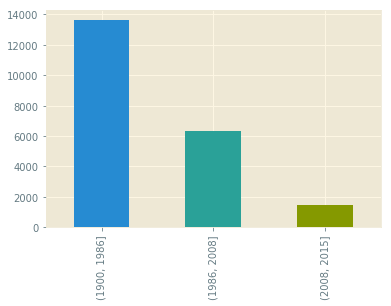

In [33]:
# 1986-2008 is the target, category separation
bins = [1900, 1986, 2008 , 2015]
# splitting the data
bins_yr_built = pd.cut(kc_housing['yr_built'], bins)
# ordering the information
bins_yr_built = bins_yr_built.cat.as_ordered()
# previewing the output
bins_yr_built.value_counts().plot(kind='bar');

Since the target years represent such a small portion of the dataset, I will not alter this column of data, beyond splitting them up in this fashion. But, this provides an avenue for inspection during feature engineering for homes built in these three categories.

In [34]:
# replacing the old data with the new categories
kc_housing['yr_built']=bins_yr_built
print(kc_housing.head())
print(kc_housing.isna().sum())

                lat     long  sqft_lot  sqft_living  sqft_above  \
id                                                                
7129300520  47.5112 -122.257      5650         1180        1180   
6414100192  47.7210 -122.319      7242         2570        2170   
5631500400  47.7379 -122.233     10000          770         770   
2487200875  47.5208 -122.393      5000         1960        1050   
1954400510  47.6168 -122.045      8080         1680        1680   

            sqft_living15  sqft_lot15 zipcode      yr_built  bedrooms  \
id                                                                      
7129300520           1340        5650   98178  (1900, 1986]         3   
6414100192           1690        7639   98125  (1900, 1986]         3   
5631500400           2720        8062   98028  (1900, 1986]         2   
2487200875           1360        5000   98136  (1900, 1986]         4   
1954400510           1800        7503   98074  (1986, 2008]         3   

           bathroo

In [35]:
kc_housing.dropna(axis=0, inplace=True)
kc_housing.isna().sum()

lat              0
long             0
sqft_lot         0
sqft_living      0
sqft_above       0
sqft_living15    0
sqft_lot15       0
zipcode          0
yr_built         0
bedrooms         0
bathrooms        0
waterfront       0
yr_renovated     0
view             0
condition        0
grade            0
sqft_basement    0
price            0
dtype: int64

## Bedroom Exploration
The larger homes are presenting differently, than smaller homes. Let's explore why.

In [36]:
# how many homes have more than 6 bedrooms?
bed_count = kc_housing.bedrooms.value_counts()
bed_count
print('percentage of homes with more than 6 bedrooms: ' + 
      str(((270 + 38 + 13+ 6 + 10 + 33 + 11) / len(kc_housing.bedrooms)) * 100))

percentage of homes with more than 6 bedrooms: 1.7764722338788643


Let's separate the homes with more than 6 bedrooms from the other types of homes.

In [37]:
# new bedrooms
kc_housing_mod_2 = kc_housing.loc[kc_housing['bedrooms'] <= 6]
print(len(kc_housing))
print(len(kc_housing_mod_2))
kc_housing_mod_2.isna().sum()

21447
21385


lat              0
long             0
sqft_lot         0
sqft_living      0
sqft_above       0
sqft_living15    0
sqft_lot15       0
zipcode          0
yr_built         0
bedrooms         0
bathrooms        0
waterfront       0
yr_renovated     0
view             0
condition        0
grade            0
sqft_basement    0
price            0
dtype: int64

Let's go and order those categroical values. We need to order this category when it is created.

In [38]:
test_bedrooms = kc_housing_mod_2['bedrooms'].value_counts()
# test_bedrooms
cat_type = CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33], ordered=True)
# cat_type
kc_housing_mod_2.loc[:, 'bedrooms'] = pd.Series.astype(kc_housing_mod_2['bedrooms'], cat_type)
kc_housing_mod_2.dtypes

/Users/student/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


lat               float64
long              float64
sqft_lot            int64
sqft_living         int64
sqft_above          int64
sqft_living15       int64
sqft_lot15          int64
zipcode          category
yr_built         category
bedrooms         category
bathrooms        category
waterfront       category
yr_renovated     category
view             category
condition        category
grade            category
sqft_basement    category
price             float64
dtype: object

In [39]:
print(kc_housing_mod_2.isna().sum())
kc_housing_mod_2['bedrooms'] = pd.CategoricalIndex(data=kc_housing_mod_2['bedrooms']).remove_unused_categories()
print(kc_housing_mod_2['bedrooms'].value_counts())

lat              0
long             0
sqft_lot         0
sqft_living      0
sqft_above       0
sqft_living15    0
sqft_lot15       0
zipcode          0
yr_built         0
bedrooms         0
bathrooms        0
waterfront       0
yr_renovated     0
view             0
condition        0
grade            0
sqft_basement    0
price            0
dtype: int64
3    9752
4    6842
2    2739
5    1592
6     266
1     194
Name: bedrooms, dtype: int64


/Users/student/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Colinearity Check

In [40]:
abs(kc_housing_mod_2.corr()) > 0.75

lat   long  sqft_lot  sqft_living  sqft_above  sqft_living15  \
lat             True  False     False        False       False          False   
long           False   True     False        False       False          False   
sqft_lot       False  False      True        False       False          False   
sqft_living    False  False     False         True        True           True   
sqft_above     False  False     False         True        True          False   
sqft_living15  False  False     False         True       False           True   
sqft_lot15     False  False     False        False       False          False   
price          False  False     False        False       False          False   

               sqft_lot15  price  
lat                 False  False  
long                False  False  
sqft_lot            False  False  
sqft_living         False  False  
sqft_above          False  False  
sqft_living15       False  False  
sqft_lot15           True  False  
price               False   True

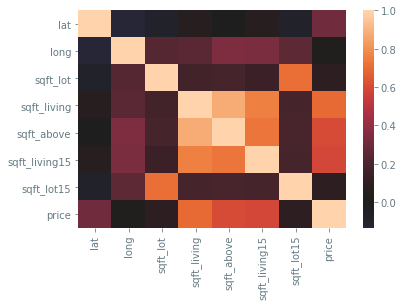

In [41]:
sns.heatmap(kc_housing_mod_2.corr(), center=0);

It looks like sqft_living and sqft_above are similiar. Since we converted the sqft_basement data into a category, and sqft_above was related to this insignifcant value, I'm inclined to drop sqft_above.

In [42]:
kc_housing_mod_2 = kc_housing_mod_2.drop(labels='sqft_above', axis=1)
kc_housing_mod_2.head()

lat     long  sqft_lot  sqft_living  sqft_living15  \
id                                                                   
7129300520  47.5112 -122.257      5650         1180           1340   
6414100192  47.7210 -122.319      7242         2570           1690   
5631500400  47.7379 -122.233     10000          770           2720   
2487200875  47.5208 -122.393      5000         1960           1360   
1954400510  47.6168 -122.045      8080         1680           1800   

            sqft_lot15 zipcode      yr_built bedrooms bathrooms waterfront  \
id                                                                           
7129300520        5650   98178  (1900, 1986]        3      1.00        0.0   
6414100192        7639   98125  (1900, 1986]        3      2.25        0.0   
5631500400        8062   98028  (1900, 1986]        2      1.00        0.0   
2487200875        5000   98136  (1900, 1986]        4      3.00        0.0   
1954400510        7503   98074  (1986, 2008]        3      2.00        0.0   

           yr_renovated view condition grade sqft_basement     price  
id                                                                    
7129300520          0.0  0.0         3     7           0.0  221900.0  
6414100192          0.0  0.0         3     7           1.0  538000.0  
5631500400          0.0  0.0         3     6           0.0  180000.0  
2487200875          0.0  0.0         5     7           1.0  604000.0  
1954400510          0.0  0.0         3     8           0.0  510000.0

In [43]:
abs(kc_housing_mod_2.corr()) > 0.75

lat   long  sqft_lot  sqft_living  sqft_living15  sqft_lot15  \
lat             True  False     False        False          False       False   
long           False   True     False        False          False       False   
sqft_lot       False  False      True        False          False       False   
sqft_living    False  False     False         True           True       False   
sqft_living15  False  False     False         True           True       False   
sqft_lot15     False  False     False        False          False        True   
price          False  False     False        False          False       False   

               price  
lat            False  
long           False  
sqft_lot       False  
sqft_living    False  
sqft_living15  False  
sqft_lot15     False  
price           True

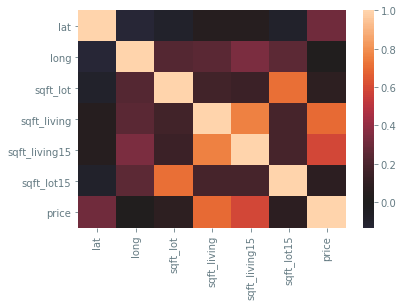

In [44]:
sns.heatmap(kc_housing_mod_2.corr(), center=0);

In [45]:
# next step
# identify which feature to drop, sqft_living or sqft_living15
kc_housing_mod_2.corr()

lat      long  sqft_lot  sqft_living  sqft_living15  \
lat            1.000000 -0.132877 -0.085143     0.050725       0.048771   
long          -0.132877  1.000000  0.228975     0.245599       0.336583   
sqft_lot      -0.085143  0.228975  1.000000     0.172049       0.144250   
sqft_living    0.050725  0.245599  0.172049     1.000000       0.759761   
sqft_living15  0.048771  0.336583  0.144250     0.759761       1.000000   
sqft_lot15    -0.085634  0.254341  0.716743     0.183166       0.182863   
price          0.308165  0.024676  0.090189     0.701803       0.585457   

               sqft_lot15     price  
lat             -0.085634  0.308165  
long             0.254341  0.024676  
sqft_lot         0.716743  0.090189  
sqft_living      0.183166  0.701803  
sqft_living15    0.182863  0.585457  
sqft_lot15       1.000000  0.083069  
price            0.083069  1.000000

It looks like sqft_living is more colinear with price, so let's drop sqft_living.

In [46]:
# Remove sqft_living from data set
kc_housing_mod_2 = kc_housing_mod_2.drop(labels='sqft_living', axis=1)
kc_housing_mod_2.head()

lat     long  sqft_lot  sqft_living15  sqft_lot15 zipcode  \
id                                                                          
7129300520  47.5112 -122.257      5650           1340        5650   98178   
6414100192  47.7210 -122.319      7242           1690        7639   98125   
5631500400  47.7379 -122.233     10000           2720        8062   98028   
2487200875  47.5208 -122.393      5000           1360        5000   98136   
1954400510  47.6168 -122.045      8080           1800        7503   98074   

                yr_built bedrooms bathrooms waterfront yr_renovated view  \
id                                                                         
7129300520  (1900, 1986]        3      1.00        0.0          0.0  0.0   
6414100192  (1900, 1986]        3      2.25        0.0          0.0  0.0   
5631500400  (1900, 1986]        2      1.00        0.0          0.0  0.0   
2487200875  (1900, 1986]        4      3.00        0.0          0.0  0.0   
1954400510  (1986, 2008]        3      2.00        0.0          0.0  0.0   

           condition grade sqft_basement     price  
id                                                  
7129300520         3     7           0.0  221900.0  
6414100192         3     7           1.0  538000.0  
5631500400         3     6           0.0  180000.0  
2487200875         5     7           1.0  604000.0  
1954400510         3     8           0.0  510000.0

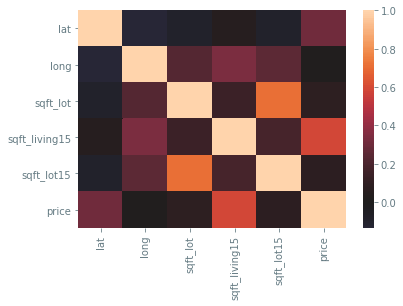

In [47]:
sns.heatmap(kc_housing_mod_2.corr(), center=0);

# Model 3.0

In [48]:
outcome = 'price'
predictors = kc_housing_mod_2.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     772.1
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:42:08   Log-Likelihood:            -2.8560e+05
No. Observations:               21385   AIC:                         5.715e+05
Df Residuals:                   21255   BIC:                         5.725e+05
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                        -2.754e+07   5.89e+06     -4.679      0.000   -3.91e+07    -1.6e+07
zipcode[T.98002]                                  1.616e+04   1.38e+04      1.168      0.243   -1.09e+04    4.33e+04
zipcode[T.98003]                                 -1.899e+04   1.24e+04     -1.536      0.125   -4.32e+04    5240.505
zipcode[T.98004]                                  7.036e+05   2.25e+04     31.225      0.000    6.59e+05    7.48e+05
zipcode[T.98005]                                  2.472e+05   2.41e+04     10.277      0.000       2e+05    2.94e+05
zipcode[T.98006]                                  1.977e+05   1.97e+04     10.046      0.000    1.59e+05    2.36e+05
zipcode[T.98007]                                  1.937e+05   2.49e+04      7.787      0.000    1.45e+05    2.42e+05
zipcode[T.98008]                                  2.131e+05   2.36e+04      9.036      0.000    1.67e+05    2.59e+05
zipcode[T.98010]                                  1.193e+05   2.13e+04      5.615      0.000    7.77e+04    1.61e+05
zipcode[T.98011]                                  6.086e+04   3.07e+04      1.984      0.047     741.649    1.21e+05
zipcode[T.98014]                                  1.028e+05   3.37e+04      3.055      0.002    3.68e+04    1.69e+05
zipcode[T.98019]                                  7.135e+04   3.32e+04      2.148      0.032    6243.529    1.36e+05
zipcode[T.98022]                                  5.265e+04   1.84e+04      2.861      0.004    1.66e+04    8.87e+04
zipcode[T.98023]                                 -5.229e+04   1.14e+04     -4.582      0.000   -7.47e+04   -2.99e+04
zipcode[T.98024]                                  1.698e+05   2.97e+04      5.722      0.000    1.12e+05    2.28e+05
zipcode[T.98027]                                  1.472e+05   2.02e+04      7.291      0.000    1.08e+05    1.87e+05
zipcode[T.98028]                                  4.434e+04   2.98e+04      1.489      0.137    -1.4e+04    1.03e+05
zipcode[T.98029]                                  1.967e+05    2.3e+04      8.537      0.000    1.52e+05    2.42e+05
zipcode[T.98030]                                  2616.1927   1.36e+04      0.192      0.847    -2.4e+04    2.93e+04
zipcode[T.98031]                                   983.3637   1.42e+04      0.069      0.945   -2.68e+04    2.88e+04
zipcode[T.98032]                                 -2.162e+04   1.65e+04     -1.312      0.190   -5.39e+04    1.07e+04
zipcode[T.98033]                                  2.951e+05   2.56e+04     11.549      0.000    2.45e+05    3.45e+05
zipcode[T.98034]                                  1.173e+05   2.74e+04      4.278      0.000    6.35e+04    1.71e+05
zipcode[T.98038]                         

The adjusted r-squared vales is 0.823. While this adjusted r-squared is lower than in previous models, colinearity has been removed. The following variable are statistically significant in the model.

- zipcodes 
 - last time there were 21 zipcodes that were insignifcant, but this time there are only 18, so I think that maybe one of the variables that we adjusted between model 2 and 3 affected the statistical significance of the category zipcode
- yr_built = 1986-2008
- bedrooms = 2, 3, 4, 5, 6
- bathrooms = 3.25, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7.5, 7.75, 8
- waterfront = 1
- yr_renovated = 1
- view = 1, 2, 3, 4
- condition = 2, 3, 4, 5
- grade = 11, 12, 13
- sqft_basement
- lat
- long
- sqft_lot
- sqft_living15

In [49]:
# histograms
# normality assumptions (linear, normal, heterskedacity)
# heat maps
# correleations
# decisions

## Find Outliers

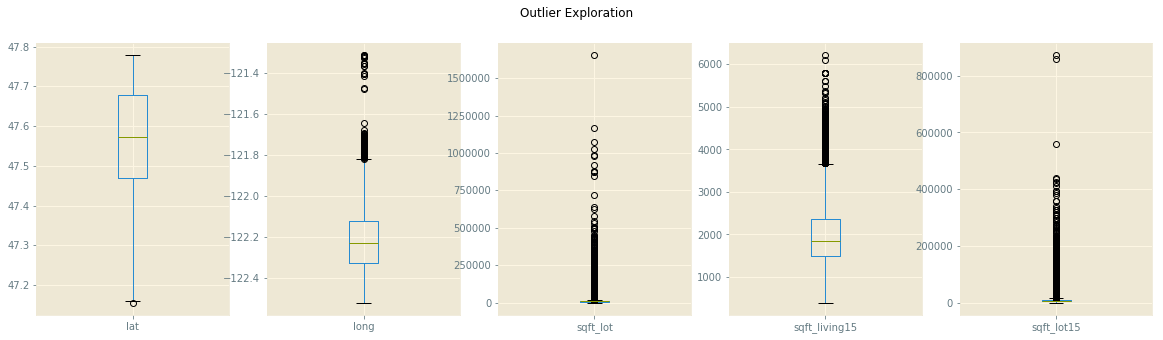

In [50]:
fig02 = plt.figure(figsize=(20,5))
fig02.suptitle('Outlier Exploration')


ax = fig02.add_subplot(151)
ax1 = kc_housing_mod_2.lat.plot(kind='box')
ax = fig02.add_subplot(152)
ax2 = kc_housing_mod_2.long.plot(kind='box')
ax = fig02.add_subplot(153)
ax3 = kc_housing_mod_2.sqft_lot.plot(kind='box')
ax = fig02.add_subplot(154)
ax6 = kc_housing_mod_2.sqft_living15.plot(kind='box')
ax = fig02.add_subplot(155)
ax7= kc_housing_mod_2.sqft_lot15.plot(kind='box')

Since both of the lot sizes have so many outliers, let's eliminate all sqft_lot > 17500. Then we'll rerun this outlier exploration.

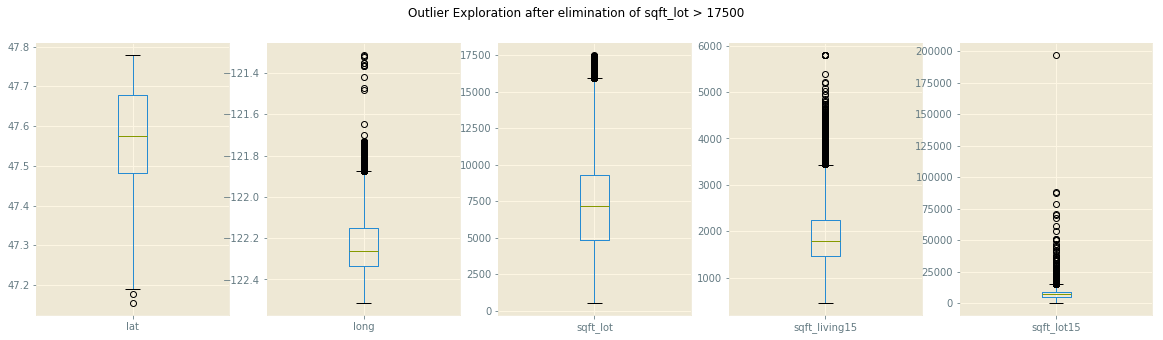

In [51]:
# eliminate all sqft_lot > 17500
kc_housing_mod_3 = kc_housing_mod_2.loc[kc_housing_mod_2['sqft_lot'] < 17500]
fig03 = plt.figure(figsize=(20,5))
fig03.suptitle('Outlier Exploration after elimination of sqft_lot > 17500')


ax = fig03.add_subplot(151)
ax1 = kc_housing_mod_3.lat.plot(kind='box')
ax = fig03.add_subplot(152)
ax2 = kc_housing_mod_3.long.plot(kind='box')
ax = fig03.add_subplot(153)
ax3 = kc_housing_mod_3.sqft_lot.plot(kind='box')
ax = fig03.add_subplot(154)
ax6 = kc_housing_mod_3.sqft_living15.plot(kind='box')
ax = fig03.add_subplot(155)
ax7 = kc_housing_mod_3.sqft_lot15.plot(kind='box')

Let's do the same thing for sqft_lot15, and eliminate all nearest neighbors with more than 15000 square foot.

length of cleaner dataset: 18238


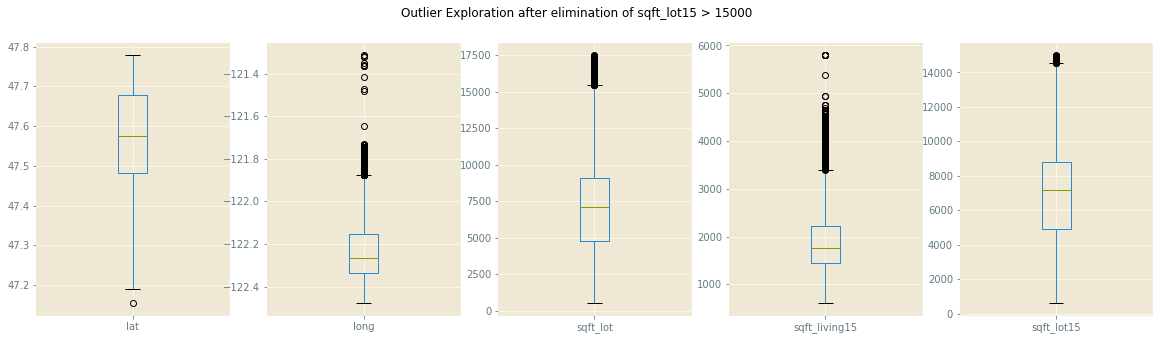

In [52]:
# eliminate all sqft_lot15 > 15000
kc_housing_mod_3 = kc_housing_mod_3.loc[kc_housing_mod_3['sqft_lot'] < 17500]
kc_housing_mod_3 = kc_housing_mod_3.loc[kc_housing_mod_3['sqft_lot15'] < 15000]
print('length of cleaner dataset: ' + str(len(kc_housing_mod_3)))
fig04 = plt.figure(figsize=(20,5))
fig04.suptitle('Outlier Exploration after elimination of sqft_lot15 > 15000')


ax = fig04.add_subplot(151)
ax1 = kc_housing_mod_3.lat.plot(kind='box')
ax = fig04.add_subplot(152)
ax2 = kc_housing_mod_3.long.plot(kind='box')
ax = fig04.add_subplot(153)
ax3 = kc_housing_mod_3.sqft_lot.plot(kind='box')
ax = fig04.add_subplot(154)
ax6 = kc_housing_mod_3.sqft_living15.plot(kind='box')
ax = fig04.add_subplot(155)
ax7= kc_housing_mod_3.sqft_lot15.plot(kind='box')

Let's do the same for sqft_living15, eliminate all values > 4000.

length of cleaner dataset: 18136


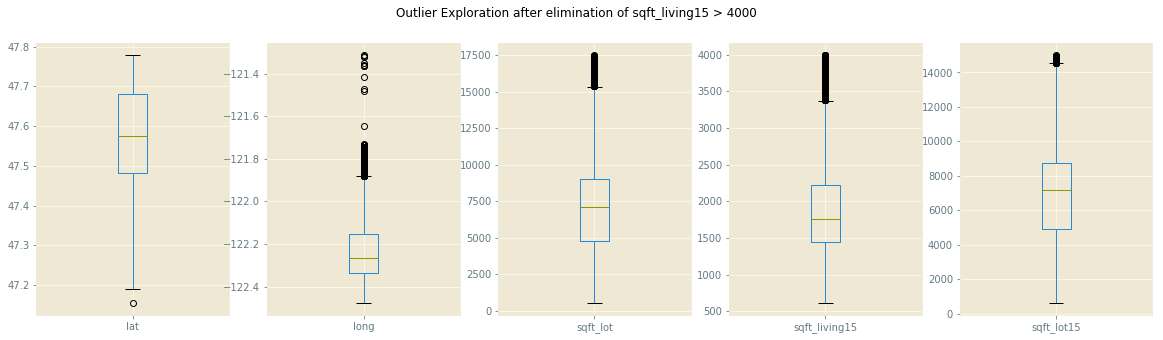

In [53]:
# eliminate all sqft_living15 > 4000
kc_housing_mod_3 = kc_housing_mod_3.loc[kc_housing_mod_3['sqft_lot'] < 17500]
kc_housing_mod_3 = kc_housing_mod_3.loc[kc_housing_mod_3['sqft_lot15'] < 15000]
kc_housing_mod_3 = kc_housing_mod_3.loc[kc_housing_mod_3['sqft_living15'] < 4000]
print('length of cleaner dataset: ' + str(len(kc_housing_mod_3)))
fig06 = plt.figure(figsize=(20,5))
fig06.suptitle('Outlier Exploration after elimination of sqft_living15 > 4000')


ax = fig06.add_subplot(151)
ax1 = kc_housing_mod_3.lat.plot(kind='box')
ax = fig06.add_subplot(152)
ax2 = kc_housing_mod_3.long.plot(kind='box')
ax = fig06.add_subplot(153)
ax3 = kc_housing_mod_3.sqft_lot.plot(kind='box')
ax = fig06.add_subplot(154)
ax6 = kc_housing_mod_3.sqft_living15.plot(kind='box')
ax = fig06.add_subplot(155)
ax7 = kc_housing_mod_3.sqft_lot15.plot(kind='box')

In [54]:
outcome = 'price'
predictors = kc_housing_mod_3.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     649.3
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:42:11   Log-Likelihood:            -2.3860e+05
No. Observations:               18136   AIC:                         4.774e+05
Df Residuals:                   18011   BIC:                         4.784e+05
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                        -3.411e+05    6.4e+06     -0.053      0.957   -1.29e+07    1.22e+07
zipcode[T.98002]                                  2.801e+04   1.22e+04      2.294      0.022    4073.841    5.19e+04
zipcode[T.98003]                                 -1703.8751   1.11e+04     -0.153      0.878   -2.35e+04    2.01e+04
zipcode[T.98004]                                  6.984e+05    2.2e+04     31.712      0.000    6.55e+05    7.42e+05
zipcode[T.98005]                                  3.612e+05   2.36e+04     15.301      0.000    3.15e+05    4.07e+05
zipcode[T.98006]                                  2.623e+05   1.93e+04     13.598      0.000    2.24e+05       3e+05
zipcode[T.98007]                                  2.757e+05   2.36e+04     11.665      0.000    2.29e+05    3.22e+05
zipcode[T.98008]                                  2.902e+05    2.3e+04     12.630      0.000    2.45e+05    3.35e+05
zipcode[T.98010]                                   9.38e+04   2.55e+04      3.672      0.000    4.37e+04    1.44e+05
zipcode[T.98011]                                  1.981e+05   2.99e+04      6.628      0.000     1.4e+05    2.57e+05
zipcode[T.98014]                                   1.88e+05   4.36e+04      4.310      0.000    1.02e+05    2.73e+05
zipcode[T.98019]                                  1.659e+05   3.32e+04      5.001      0.000    1.01e+05    2.31e+05
zipcode[T.98022]                                  1.357e+04   1.95e+04      0.695      0.487   -2.47e+04    5.18e+04
zipcode[T.98023]                                 -2.868e+04   1.07e+04     -2.677      0.007   -4.97e+04   -7678.041
zipcode[T.98024]                                  1.944e+05   3.67e+04      5.294      0.000    1.22e+05    2.66e+05
zipcode[T.98027]                                  2.372e+05    2.1e+04     11.303      0.000    1.96e+05    2.78e+05
zipcode[T.98028]                                  1.784e+05   2.92e+04      6.119      0.000    1.21e+05    2.36e+05
zipcode[T.98029]                                   2.64e+05    2.3e+04     11.491      0.000    2.19e+05    3.09e+05
zipcode[T.98030]                                  1.967e+04   1.23e+04      1.594      0.111   -4513.400    4.39e+04
zipcode[T.98031]                                  2.975e+04   1.31e+04      2.274      0.023    4103.538    5.54e+04
zipcode[T.98032]                                  9416.0320   1.47e+04      0.639      0.523   -1.95e+04    3.83e+04
zipcode[T.98033]                                  3.916e+05    2.5e+04     15.654      0.000    3.43e+05    4.41e+05
zipcode[T.98034]                                  2.392e+05   2.69e+04      8.883      0.000    1.86e+05    2.92e+05
zipcode[T.98038]                         

After eliminating outliers, our adjusted r-squared value is 0.821, which is lower than before. Let's see if the variable p-values have gotten better.
- This model increases the statistical significace to all but 6 zipcodes.
- yr_built = 1986-2008, 2008-2015
- bedrooms = 2, 3, 4, 5, 6
- bathrooms = 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 6, 6.25, 6.75, 7.75, 8
- waterfront = 1
- yr_renovated = 1
- view = 1, 2, 3, 4
- condition = 2, 3, 4, 5
- grade = 11, 12, 13
- sqft_basement = 1
- long
- sqft_lot
- sqft_living15
This model is much improved over the last model that we had because more of the data is significant. Let's start to train this model by picking out the most important contributors.

## Modeling

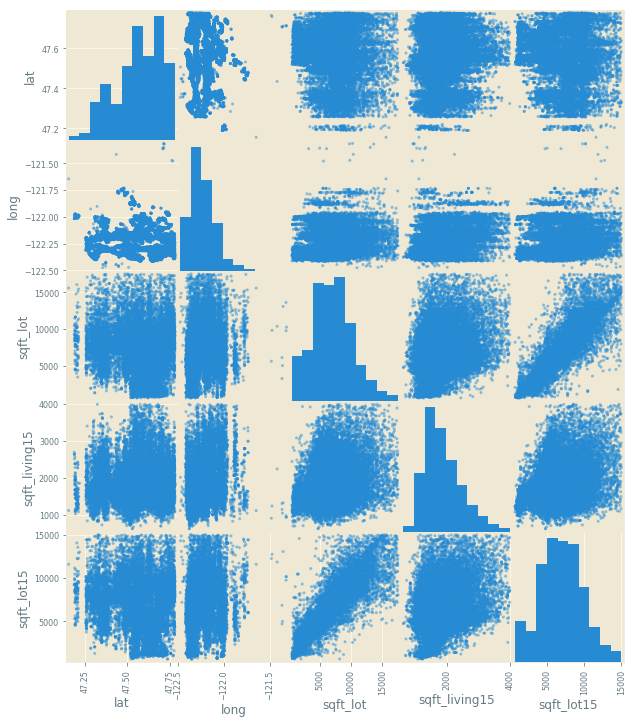

In [55]:
x_cols = ['lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
pd.plotting.scatter_matrix(kc_housing_mod_3[x_cols], figsize=(10,12));

None of this data is normalized. We'll have to transform it.

## Visualizations

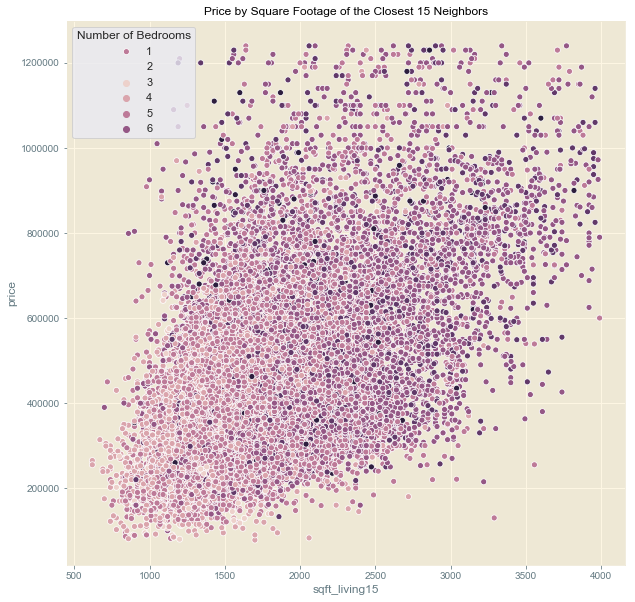

In [56]:
fig20 = plt.figure(figsize=(10,10))
ax1 = fig20.add_subplot(111)
sns.set(palette='colorblind')
visual1 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1250000]
ax1 = sns.scatterplot(x=visual1['sqft_living15'], 
                      y=visual1['price'], legend='full', hue=visual1['bedrooms'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Number of Bedrooms', loc='upper left', labels=['1', '2', '3', '4', '5', '6'])
fig20.savefig('Price by Square Footage of the Closest 15 Neighbors1.png')

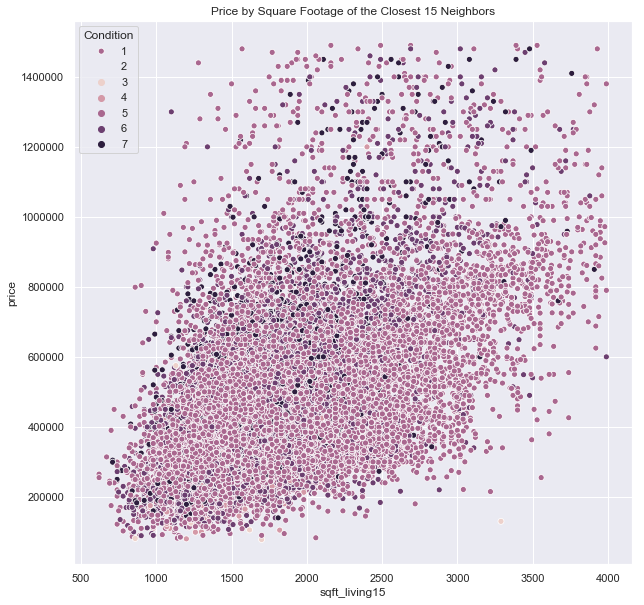

In [57]:
fig21 = plt.figure(figsize=(10,10))
ax1 = fig21.add_subplot(111)
visual2 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1500000]
ax1 = sns.scatterplot(x=visual2['sqft_living15'], 
                      y=visual2['price'], legend='full', hue=visual2['condition'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Condition', loc='upper left', labels=['1', '2', '3', '4', '5', '6', '7'])
fig21.savefig('Price by Square Footage of the Closest 15 Neighbors Condition.png')

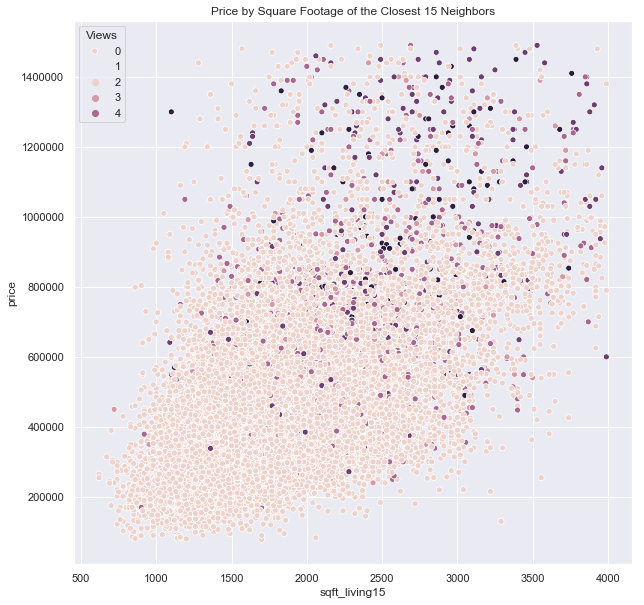

In [58]:
fig22 = plt.figure(figsize=(10,10))
ax1 = fig22.add_subplot(111)
visual2 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 1500000]
ax1 = sns.scatterplot(x=visual2['sqft_living15'], 
                      y=visual2['price'], legend='full', hue=visual2['view'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Views', loc='upper left', labels=['0', '1', '2', '3', '4'])
fig22.savefig('Price by Square Footage of the Closest 15 Neighbors View.png')

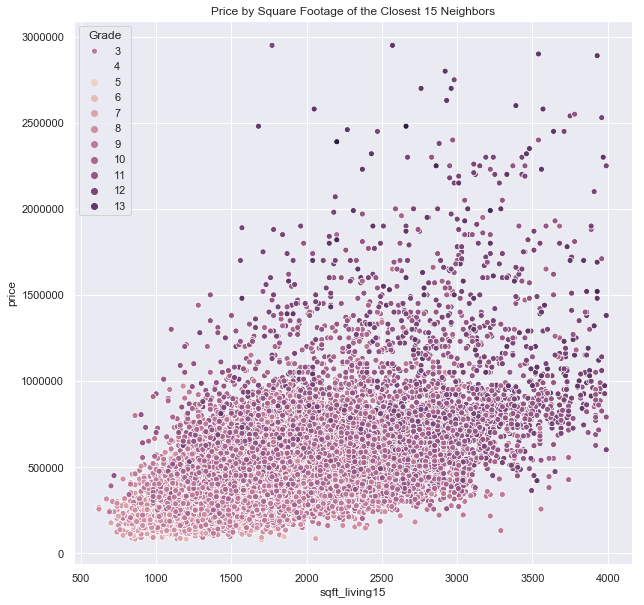

In [59]:
fig23 = plt.figure(figsize=(10,10))
ax1 = fig23.add_subplot(111)
visual3 = kc_housing_mod_3.loc[kc_housing_mod_3['price'] < 3000000]
ax1 = sns.scatterplot(x=visual3['sqft_living15'], 
                      y=visual3['price'], legend='full', hue=visual3['grade'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Grade', loc='upper left', labels=['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])
fig23.savefig('Price by Square Footage of the Closest 15 Neighbors Grade.png')

In [61]:
# # sqft_living15 log transformation
# non_normal = ['sqft_living15']
# for feat in non_normal:
#     kc_housing_mod_3[feat] = kc_housing_mod_3[feat].map(lambda x: np.log(x))
# kc_housing_mod_4 = kc_housing_mod_3
# pd.plotting.scatter_matrix(kc_housing_mod_4[x_cols], figsize=(10,12));

In [62]:
# # sqft_lot min-max scaling
# min_lot = min(kc_housing_mod_4['sqft_lot'])
# # min_age
# max_lot = max(kc_housing_mod_4['sqft_lot'])
# # max_age
# transform = []
# for m, j in enumerate(kc_housing_mod_4['sqft_lot']):
#     transform.append((m - min_lot) / (max_lot - min_lot))
# lot_min_max = pd.DataFrame(transform)
# lot_min_max.index = list(kc_housing_mod_4.index)
# lot_min_max.columns = ['sqft_lot_t']
# kc_housing_mod_4 = kc_housing_mod_4.drop(labels='sqft_lot', axis=1)
# new_df = [kc_housing_mod_4, lot_min_max]
# kc_housing_transform = pd.concat(new_df, axis=1)
# x_cols = ['lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot_t']
# pd.plotting.scatter_matrix(kc_housing_transform[x_cols], figsize=(10,12));
# # the output on this is awful, going to leave it the same

## Time for regression diagnositics!

In [63]:
# general data sense
kc_housing_mod_3.describe()

lat          long      sqft_lot  sqft_living15    sqft_lot15  \
count  18136.000000  18136.000000  18136.000000   18136.000000  18136.000000   
mean      47.563306   -122.230335   7045.595887    1882.012186   6920.855922   
std        0.136212      0.130875   3239.104718     590.954927   2876.648751   
min       47.155900   -122.475000    572.000000     620.000000    651.000000   
25%       47.481800   -122.337000   4800.000000    1450.000000   4920.000000   
50%       47.574700   -122.268000   7100.000000    1760.000000   7194.000000   
75%       47.679500   -122.154000   9024.250000    2220.000000   8768.500000   
max       47.777600   -121.315000  17487.000000    3990.000000  14984.000000   

              price  
count  1.813600e+04  
mean   5.023303e+05  
std    2.926469e+05  
min    7.800000e+04  
25%    3.125000e+05  
50%    4.350000e+05  
75%    6.091250e+05  
max    4.670000e+06

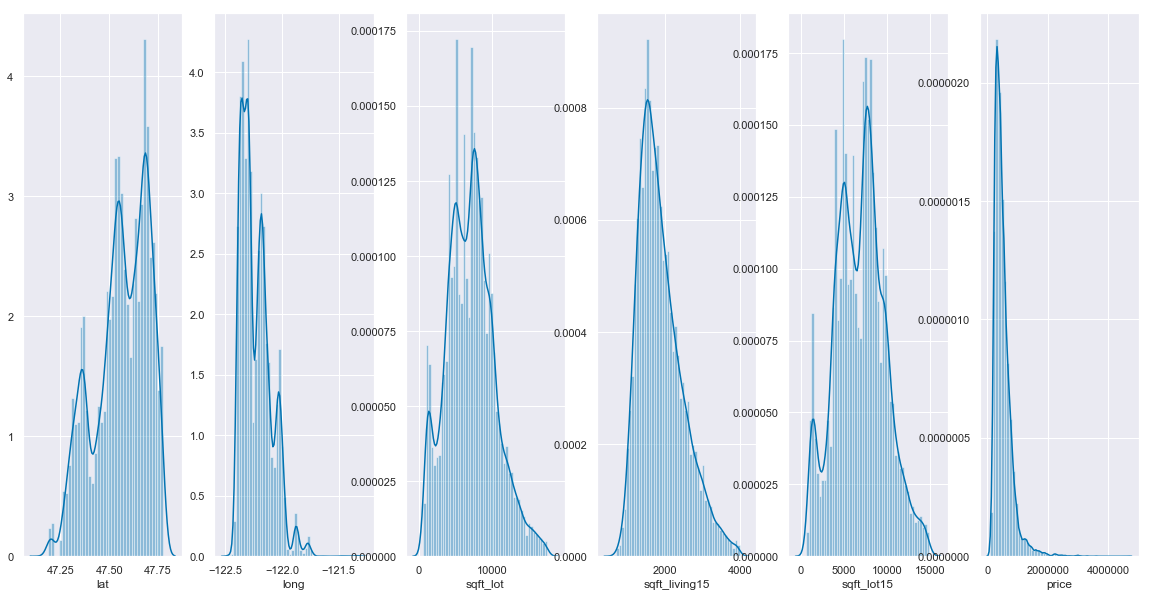

In [64]:
# normality check
fig10 = plt.figure(figsize=(20,10))
ax1 = fig10.add_subplot(161)
sns.distplot(kc_housing_mod_3['lat'])
ax2 = fig10.add_subplot(162)
sns.distplot(kc_housing_mod_3['long'])
ax3 = fig10.add_subplot(163)
sns.distplot(kc_housing_mod_3['sqft_lot'])
ax4 = fig10.add_subplot(164)
sns.distplot(kc_housing_mod_3['sqft_living15'])
ax5 = fig10.add_subplot(165)
sns.distplot(kc_housing_mod_3['sqft_lot15'])
ax6 = fig10.add_subplot(166)
sns.distplot(kc_housing_mod_3['price']);

To note here, lat and long will only be used together. The real predictors that we're evaulating are sqft_lot, sqft_living15, and sqft_lot15 (which wasn't statistically significant in the last model). So, sqft_living15 is normal, both sqft_lot and sqft_lot15 are close with some abnormality on the left side of the graph.

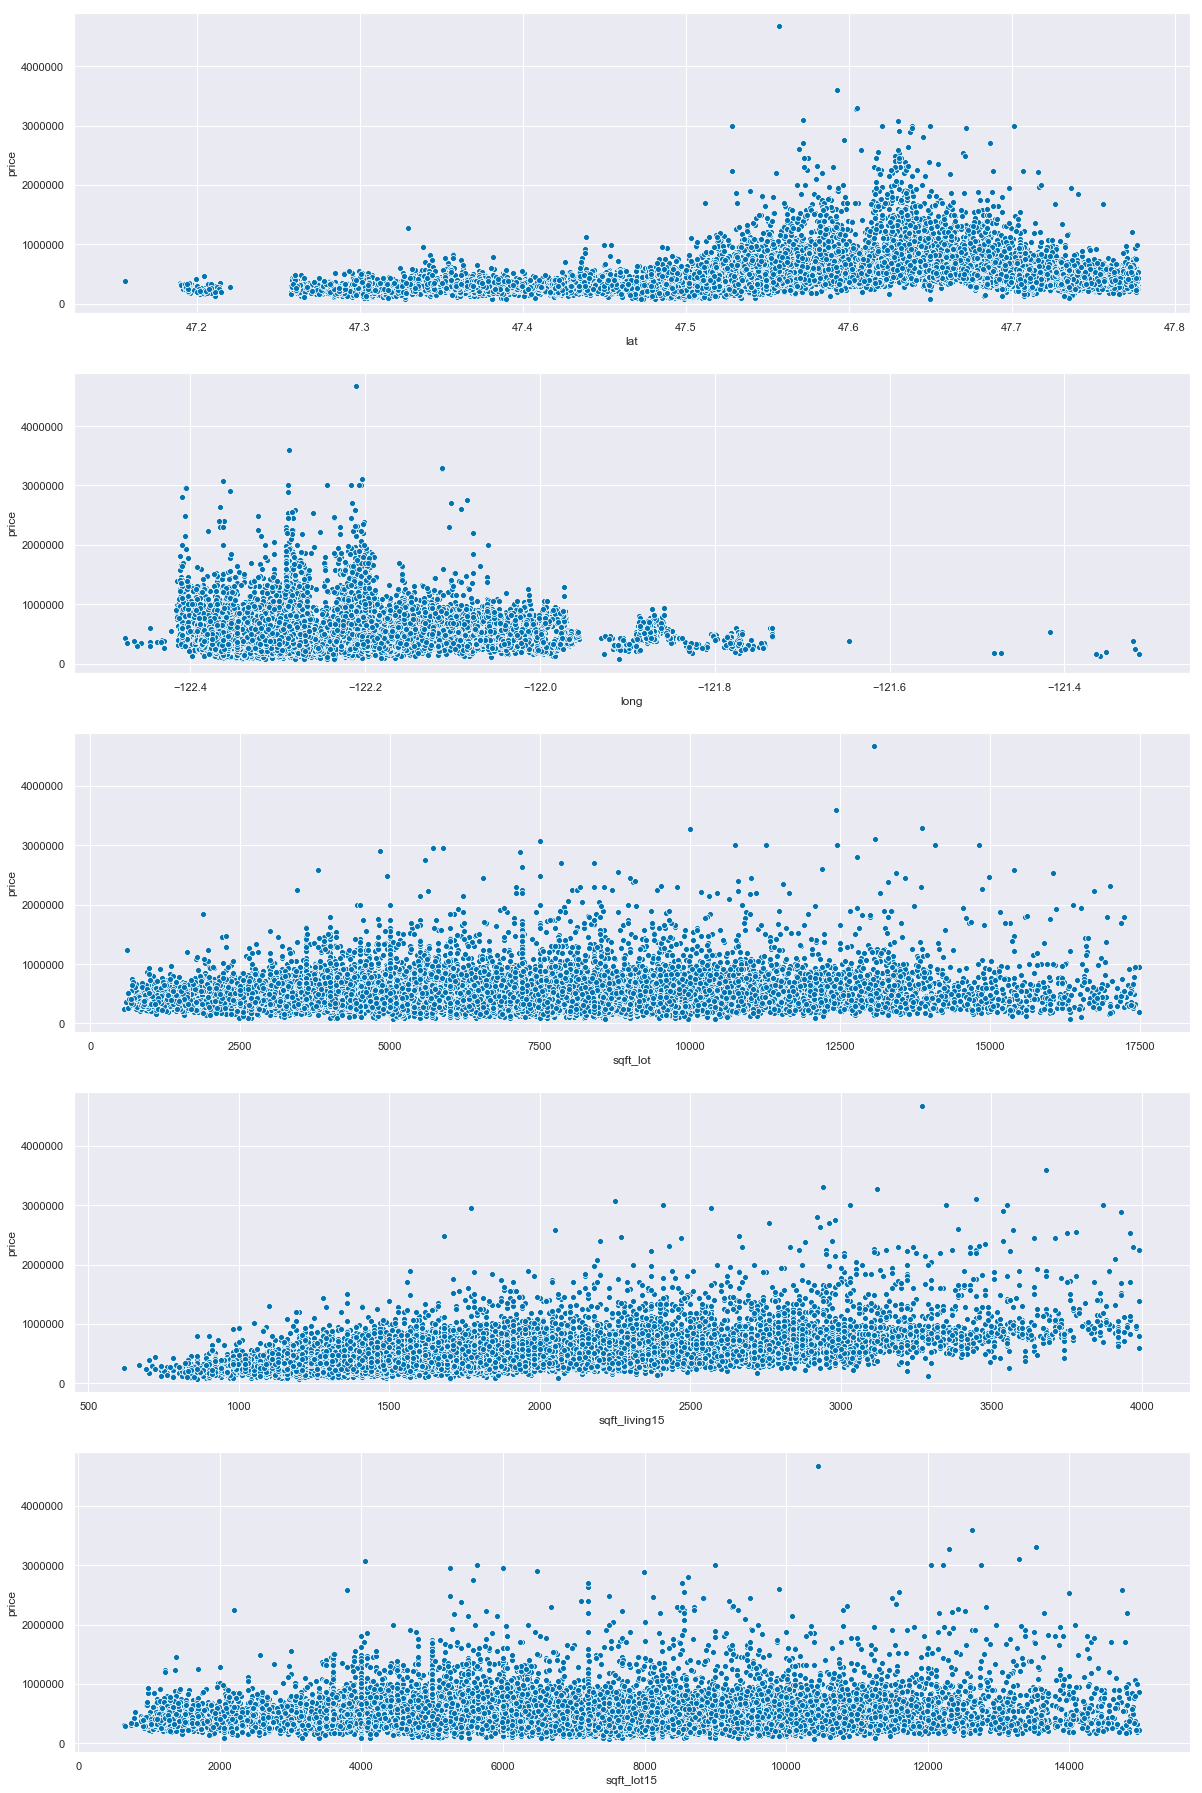

In [65]:
# check for linearity
fig11 = plt.figure(figsize=(20,32))
ax1 = fig11.add_subplot(511)
ax1 = sns.scatterplot(kc_housing_mod_3['lat'],kc_housing_mod_3['price'])
ax2 = fig11.add_subplot(512)
ax2 = sns.scatterplot(kc_housing_mod_3['long'],kc_housing_mod_3['price'])
ax3 = fig11.add_subplot(513)
ax3 = sns.scatterplot(kc_housing_mod_3['sqft_lot'],kc_housing_mod_3['price'])
ax4 = fig11.add_subplot(514)
ax4 = sns.scatterplot(kc_housing_mod_3['sqft_living15'],kc_housing_mod_3['price'])
ax5 = fig11.add_subplot(515)
ax5 = sns.scatterplot(kc_housing_mod_3['sqft_lot15'],kc_housing_mod_3['price']);

In [66]:
# model
outcome = 'price'
predictors = kc_housing_mod_3.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     649.3
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:46:17   Log-Likelihood:            -2.3860e+05
No. Observations:               18136   AIC:                         4.774e+05
Df Residuals:                   18011   BIC:                         4.784e+05
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                        -3.411e+05    6.4e+06     -0.053      0.957   -1.29e+07    1.22e+07
zipcode[T.98002]                                  2.801e+04   1.22e+04      2.294      0.022    4073.841    5.19e+04
zipcode[T.98003]                                 -1703.8751   1.11e+04     -0.153      0.878   -2.35e+04    2.01e+04
zipcode[T.98004]                                  6.984e+05    2.2e+04     31.712      0.000    6.55e+05    7.42e+05
zipcode[T.98005]                                  3.612e+05   2.36e+04     15.301      0.000    3.15e+05    4.07e+05
zipcode[T.98006]                                  2.623e+05   1.93e+04     13.598      0.000    2.24e+05       3e+05
zipcode[T.98007]                                  2.757e+05   2.36e+04     11.665      0.000    2.29e+05    3.22e+05
zipcode[T.98008]                                  2.902e+05    2.3e+04     12.630      0.000    2.45e+05    3.35e+05
zipcode[T.98010]                                   9.38e+04   2.55e+04      3.672      0.000    4.37e+04    1.44e+05
zipcode[T.98011]                                  1.981e+05   2.99e+04      6.628      0.000     1.4e+05    2.57e+05
zipcode[T.98014]                                   1.88e+05   4.36e+04      4.310      0.000    1.02e+05    2.73e+05
zipcode[T.98019]                                  1.659e+05   3.32e+04      5.001      0.000    1.01e+05    2.31e+05
zipcode[T.98022]                                  1.357e+04   1.95e+04      0.695      0.487   -2.47e+04    5.18e+04
zipcode[T.98023]                                 -2.868e+04   1.07e+04     -2.677      0.007   -4.97e+04   -7678.041
zipcode[T.98024]                                  1.944e+05   3.67e+04      5.294      0.000    1.22e+05    2.66e+05
zipcode[T.98027]                                  2.372e+05    2.1e+04     11.303      0.000    1.96e+05    2.78e+05
zipcode[T.98028]                                  1.784e+05   2.92e+04      6.119      0.000    1.21e+05    2.36e+05
zipcode[T.98029]                                   2.64e+05    2.3e+04     11.491      0.000    2.19e+05    3.09e+05
zipcode[T.98030]                                  1.967e+04   1.23e+04      1.594      0.111   -4513.400    4.39e+04
zipcode[T.98031]                                  2.975e+04   1.31e+04      2.274      0.023    4103.538    5.54e+04
zipcode[T.98032]                                  9416.0320   1.47e+04      0.639      0.523   -1.95e+04    3.83e+04
zipcode[T.98033]                                  3.916e+05    2.5e+04     15.654      0.000    3.43e+05    4.41e+05
zipcode[T.98034]                                  2.392e+05   2.69e+04      8.883      0.000    1.86e+05    2.92e+05
zipcode[T.98038]                         

The best linear model is sqft_living15. Lat and long also show weak linearity. Sqft_lot and sqft_lot15 show even weaker linearity, but it is there.

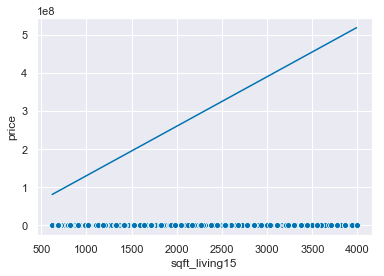

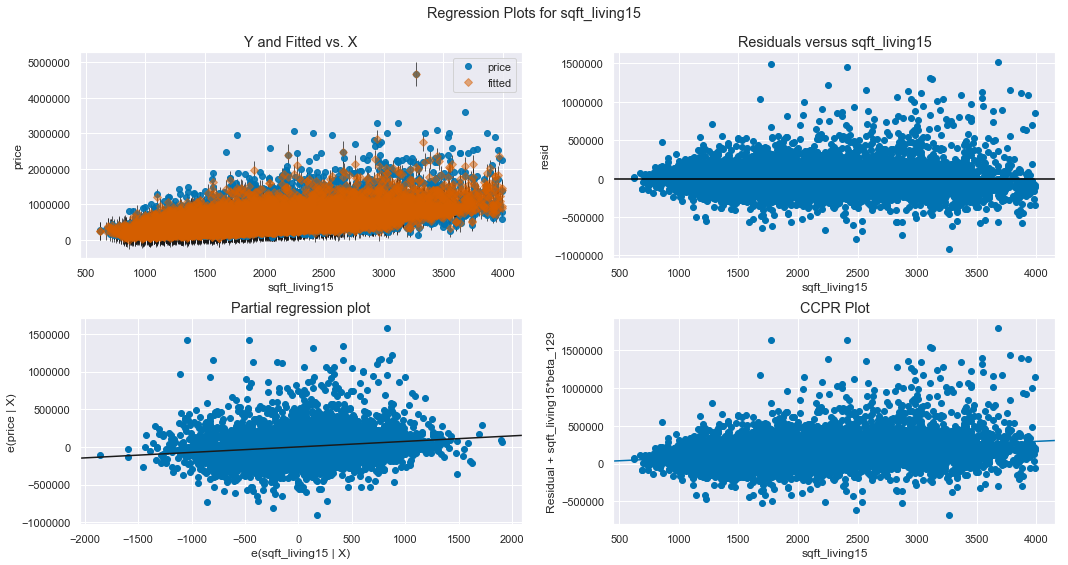

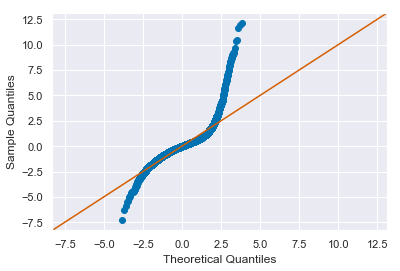

In [67]:
# create a DataFrame with the minimum and maximum values of sqft_living15
sqft_living15_min_max = [kc_housing_mod_3['sqft_living15'].min(), kc_housing_mod_3['sqft_living15'].max()]
# make predictions for those x values and store them
def predicted_y (xs): #predicted y values based on x values
    import numpy as np
    m = 129800
    c = 643400
    y_predicted = []
    for x in xs:
        y_predicted.append(m*x + c)
    return y_predicted
predicted_y = predicted_y(sqft_living15_min_max)
# first, plot the observed data and the least squares line
sns.scatterplot(kc_housing_mod_3['sqft_living15'],kc_housing_mod_3['price'])
sns.lineplot(sqft_living15_min_max,predicted_y)
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

Well, sqft_living15 is heterskedastic, and unreliable. Let's check sqft_lot.

In [68]:
# # create a DataFrame with the minimum and maximum values of sqft_lot
# sqft_lot_min_max = [kc_housing_mod_3['sqft_lot'].min(), kc_housing_mod_3['sqft_lot'].max()]
# # make predictions for those x values and store them
# def predicted_y (xs): #predicted y values based on x values
#     import numpy as np
#     m = 7.2305
#     c = 643400
#     y_predicted = []
#     for x in xs:
#         y_predicted.append(m*x + c)
#     return y_predicted
# predicted_y = predicted_y(sqft_lot_min_max)
# # first, plot the observed data and the least squares line
# sns.scatterplot(kc_housing_mod_3['sqft_lot'],kc_housing_mod_3['price'])
# sns.lineplot(sqft_lot_min_max,predicted_y)
# fig = plt.figure(figsize=(15,8))
# fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
# residuals = model.resid
# fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
# decided to powertransform with yeo-johnson instead

sqft_lot isn't heterskedastic, but also isn't normal. Let's look at a transformation for both, specifically a powertransformation.

In [69]:
# # power transform
# sqft_living15_data = kc_housing_mod_4['sqft_living15']
# kc_housing_mod_4['sqft_living15'] = stats.yeojohnson(sqft_living15_data, lmbda=-0.5551641516869747)
# # this particular power transfromation from stats models can only be performed on float data,
# # so conversion of sqft_lot to float64
# kc_housing_mod_4['sqft_lot'] = kc_housing_mod_4['sqft_lot'].astype(dtype='float64')
# sqft_lot_data = kc_housing_mod_4['sqft_lot']
# kc_housing_mod_4['sqft_lot'] = stats.yeojohnson(sqft_lot_data, lmbda=0.7043134629464194)
# pd.plotting.scatter_matrix(kc_housing_mod_4[x_cols], figsize=(10,12));

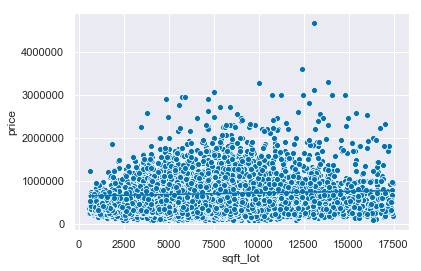

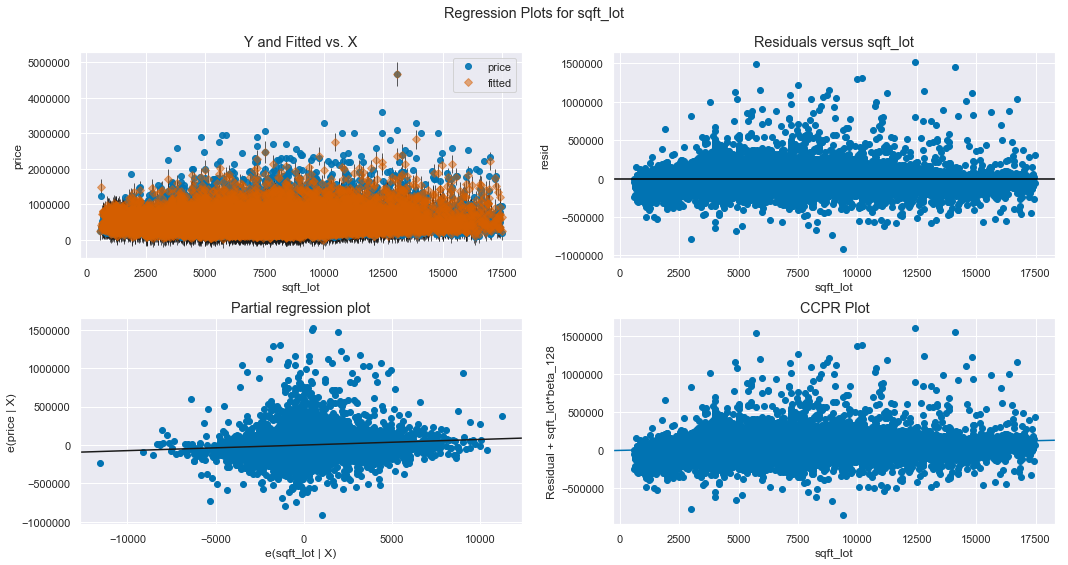

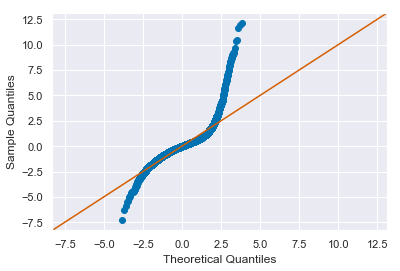

In [70]:
# create a DataFrame with the minimum and maximum values of sqft_lot
sqft_lot_min_max = [kc_housing_mod_3['sqft_lot'].min(), kc_housing_mod_3['sqft_lot'].max()]
# make predictions for those x values and store them
def predicted_y (xs): #predicted y values based on x values
    import numpy as np
    m = 7.2305
    c = 643400
    y_predicted = []
    for x in xs:
        y_predicted.append(m*x + c)
    return y_predicted
predicted_y = predicted_y(sqft_lot_min_max)
# first, plot the observed data and the least squares line
sns.scatterplot(kc_housing_mod_3['sqft_lot'],kc_housing_mod_3['price'])
sns.lineplot(sqft_lot_min_max,predicted_y)
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

None of these models really fit the normal, linear, and heterskedastic criteria. So, let's develop some features.

## Features

In [73]:
# lot divided by living15
lot_per_living15 = []
i = 0
for i in kc_housing_mod_3['sqft_lot']:
    for j in kc_housing_mod_3['sqft_living15']:
        dividend = i / j
    lot_per_living15.append(dividend)
lot_per_living15 = pd.DataFrame(data=lot_per_living15)
lot_per_living15.index = list(kc_housing_mod_3.index)
lot_per_living15.columns = ['lot_per_living15']
kc_housing_mod_5 = pd.concat([kc_housing_mod_3, lot_per_living15], axis=1)
kc_housing_mod_5.head()

lat     long  sqft_lot  sqft_living15  sqft_lot15 zipcode  \
id                                                                          
7129300520  47.5112 -122.257      5650           1340        5650   98178   
6414100192  47.7210 -122.319      7242           1690        7639   98125   
5631500400  47.7379 -122.233     10000           2720        8062   98028   
2487200875  47.5208 -122.393      5000           1360        5000   98136   
1954400510  47.6168 -122.045      8080           1800        7503   98074   

                yr_built bedrooms bathrooms waterfront yr_renovated view  \
id                                                                         
7129300520  (1900, 1986]        3      1.00        0.0          0.0  0.0   
6414100192  (1900, 1986]        3      2.25        0.0          0.0  0.0   
5631500400  (1900, 1986]        2      1.00        0.0          0.0  0.0   
2487200875  (1900, 1986]        4      3.00        0.0          0.0  0.0   
1954400510  (1986, 2008]        3      2.00        0.0          0.0  0.0   

           condition grade sqft_basement     price  lot_per_living15  
id                                                                    
7129300520         3     7           0.0  221900.0          5.539216  
6414100192         3     7           1.0  538000.0          7.100000  
5631500400         3     6           0.0  180000.0          9.803922  
2487200875         5     7           1.0  604000.0          4.901961  
1954400510         3     8           0.0  510000.0          7.921569

In [74]:
# model
outcome = 'price'
predictors = kc_housing_mod_5.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     649.3
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:49:08   Log-Likelihood:            -2.3860e+05
No. Observations:               18136   AIC:                         4.774e+05
Df Residuals:                   18011   BIC:                         4.784e+05
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                        -3.411e+05    6.4e+06     -0.053      0.957   -1.29e+07    1.22e+07
zipcode[T.98002]                                  2.801e+04   1.22e+04      2.294      0.022    4073.841    5.19e+04
zipcode[T.98003]                                 -1703.8751   1.11e+04     -0.153      0.878   -2.35e+04    2.01e+04
zipcode[T.98004]                                  6.984e+05    2.2e+04     31.712      0.000    6.55e+05    7.42e+05
zipcode[T.98005]                                  3.612e+05   2.36e+04     15.301      0.000    3.15e+05    4.07e+05
zipcode[T.98006]                                  2.623e+05   1.93e+04     13.598      0.000    2.24e+05       3e+05
zipcode[T.98007]                                  2.757e+05   2.36e+04     11.665      0.000    2.29e+05    3.22e+05
zipcode[T.98008]                                  2.902e+05    2.3e+04     12.630      0.000    2.45e+05    3.35e+05
zipcode[T.98010]                                   9.38e+04   2.55e+04      3.672      0.000    4.37e+04    1.44e+05
zipcode[T.98011]                                  1.981e+05   2.99e+04      6.628      0.000     1.4e+05    2.57e+05
zipcode[T.98014]                                   1.88e+05   4.36e+04      4.310      0.000    1.02e+05    2.73e+05
zipcode[T.98019]                                  1.659e+05   3.32e+04      5.001      0.000    1.01e+05    2.31e+05
zipcode[T.98022]                                  1.357e+04   1.95e+04      0.695      0.487   -2.47e+04    5.18e+04
zipcode[T.98023]                                 -2.868e+04   1.07e+04     -2.677      0.007   -4.97e+04   -7678.041
zipcode[T.98024]                                  1.944e+05   3.67e+04      5.294      0.000    1.22e+05    2.66e+05
zipcode[T.98027]                                  2.372e+05    2.1e+04     11.303      0.000    1.96e+05    2.78e+05
zipcode[T.98028]                                  1.784e+05   2.92e+04      6.119      0.000    1.21e+05    2.36e+05
zipcode[T.98029]                                   2.64e+05    2.3e+04     11.491      0.000    2.19e+05    3.09e+05
zipcode[T.98030]                                  1.967e+04   1.23e+04      1.594      0.111   -4513.400    4.39e+04
zipcode[T.98031]                                  2.975e+04   1.31e+04      2.274      0.023    4103.538    5.54e+04
zipcode[T.98032]                                  9416.0320   1.47e+04      0.639      0.523   -1.95e+04    3.83e+04
zipcode[T.98033]                                  3.916e+05    2.5e+04     15.654      0.000    3.43e+05    4.41e+05
zipcode[T.98034]                                  2.392e+05   2.69e+04      8.883      0.000    1.86e+05    2.92e+05
zipcode[T.98038]                         

In [75]:
# # bedrooms per sqft_lot
bedrooms_per_sqft_lot = []
i = 0
for i in kc_housing_mod_5['bedrooms']:
    for j in kc_housing_mod_5['sqft_lot']:
        dividend = j / i
    bedrooms_per_sqft_lot.append(dividend)
bedrooms_per_sqft_lot = pd.DataFrame(data=bedrooms_per_sqft_lot)
bedrooms_per_sqft_lot.index = list(kc_housing_mod_5.index)
bedrooms_per_sqft_lot.columns = ['bedrooms_per_sqft_lot']
kc_housing_mod_6 = pd.concat([kc_housing_mod_5, bedrooms_per_sqft_lot], axis=1)
kc_housing_mod_6.head()

lat     long  sqft_lot  sqft_living15  sqft_lot15 zipcode  \
id                                                                          
7129300520  47.5112 -122.257      5650           1340        5650   98178   
6414100192  47.7210 -122.319      7242           1690        7639   98125   
5631500400  47.7379 -122.233     10000           2720        8062   98028   
2487200875  47.5208 -122.393      5000           1360        5000   98136   
1954400510  47.6168 -122.045      8080           1800        7503   98074   

                yr_built bedrooms bathrooms waterfront yr_renovated view  \
id                                                                         
7129300520  (1900, 1986]        3      1.00        0.0          0.0  0.0   
6414100192  (1900, 1986]        3      2.25        0.0          0.0  0.0   
5631500400  (1900, 1986]        2      1.00        0.0          0.0  0.0   
2487200875  (1900, 1986]        4      3.00        0.0          0.0  0.0   
1954400510  (1986, 2008]        3      2.00        0.0          0.0  0.0   

           condition grade sqft_basement     price  lot_per_living15  \
id                                                                     
7129300520         3     7           0.0  221900.0          5.539216   
6414100192         3     7           1.0  538000.0          7.100000   
5631500400         3     6           0.0  180000.0          9.803922   
2487200875         5     7           1.0  604000.0          4.901961   
1954400510         3     8           0.0  510000.0          7.921569   

            bedrooms_per_sqft_lot  
id                                 
7129300520             358.666667  
6414100192             358.666667  
5631500400             538.000000  
2487200875             269.000000  
1954400510             358.666667

In [76]:
# model
outcome = 'price'
predictors = kc_housing_mod_6.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_6).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     649.3
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:50:01   Log-Likelihood:            -2.3860e+05
No. Observations:               18136   AIC:                         4.774e+05
Df Residuals:                   18011   BIC:                         4.784e+05
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                        -1.669e+05   4.62e+06     -0.036      0.971   -9.22e+06    8.88e+06
zipcode[T.98002]                                  2.801e+04   1.22e+04      2.294      0.022    4073.841    5.19e+04
zipcode[T.98003]                                 -1703.8751   1.11e+04     -0.153      0.878   -2.35e+04    2.01e+04
zipcode[T.98004]                                  6.984e+05    2.2e+04     31.712      0.000    6.55e+05    7.42e+05
zipcode[T.98005]                                  3.612e+05   2.36e+04     15.301      0.000    3.15e+05    4.07e+05
zipcode[T.98006]                                  2.623e+05   1.93e+04     13.598      0.000    2.24e+05       3e+05
zipcode[T.98007]                                  2.757e+05   2.36e+04     11.665      0.000    2.29e+05    3.22e+05
zipcode[T.98008]                                  2.902e+05    2.3e+04     12.630      0.000    2.45e+05    3.35e+05
zipcode[T.98010]                                   9.38e+04   2.55e+04      3.672      0.000    4.37e+04    1.44e+05
zipcode[T.98011]                                  1.981e+05   2.99e+04      6.628      0.000     1.4e+05    2.57e+05
zipcode[T.98014]                                   1.88e+05   4.36e+04      4.310      0.000    1.02e+05    2.73e+05
zipcode[T.98019]                                  1.659e+05   3.32e+04      5.001      0.000    1.01e+05    2.31e+05
zipcode[T.98022]                                  1.357e+04   1.95e+04      0.695      0.487   -2.47e+04    5.18e+04
zipcode[T.98023]                                 -2.868e+04   1.07e+04     -2.677      0.007   -4.97e+04   -7678.041
zipcode[T.98024]                                  1.944e+05   3.67e+04      5.294      0.000    1.22e+05    2.66e+05
zipcode[T.98027]                                  2.372e+05    2.1e+04     11.303      0.000    1.96e+05    2.78e+05
zipcode[T.98028]                                  1.784e+05   2.92e+04      6.119      0.000    1.21e+05    2.36e+05
zipcode[T.98029]                                   2.64e+05    2.3e+04     11.491      0.000    2.19e+05    3.09e+05
zipcode[T.98030]                                  1.967e+04   1.23e+04      1.594      0.111   -4513.400    4.39e+04
zipcode[T.98031]                                  2.975e+04   1.31e+04      2.274      0.023    4103.538    5.54e+04
zipcode[T.98032]                                  9416.0319   1.47e+04      0.639      0.523   -1.95e+04    3.83e+04
zipcode[T.98033]                                  3.916e+05    2.5e+04     15.654      0.000    3.43e+05    4.41e+05
zipcode[T.98034]                                  2.392e+05   2.69e+04      8.883      0.000    1.86e+05    2.92e+05
zipcode[T.98038]                         

In [77]:
# bathrooms per bedroom
bathrooms_per_bedroom = []
i = 0
for i in kc_housing_mod_6['bathrooms']:
    for j in kc_housing_mod_6['bedrooms']:
        dividend = i / j
    bathrooms_per_bedroom.append(dividend)
bathrooms_per_bedroom = pd.DataFrame(data=bathrooms_per_bedroom)
bathrooms_per_bedroom.index = list(kc_housing_mod_5.index)
bathrooms_per_bedroom.columns = ['bathrooms_per_bedroom']
kc_housing_mod_7 = pd.concat([kc_housing_mod_6, bathrooms_per_bedroom], axis=1)
kc_housing_mod_7.head()

lat     long  sqft_lot  sqft_living15  sqft_lot15 zipcode  \
id                                                                          
7129300520  47.5112 -122.257      5650           1340        5650   98178   
6414100192  47.7210 -122.319      7242           1690        7639   98125   
5631500400  47.7379 -122.233     10000           2720        8062   98028   
2487200875  47.5208 -122.393      5000           1360        5000   98136   
1954400510  47.6168 -122.045      8080           1800        7503   98074   

                yr_built bedrooms bathrooms waterfront yr_renovated view  \
id                                                                         
7129300520  (1900, 1986]        3      1.00        0.0          0.0  0.0   
6414100192  (1900, 1986]        3      2.25        0.0          0.0  0.0   
5631500400  (1900, 1986]        2      1.00        0.0          0.0  0.0   
2487200875  (1900, 1986]        4      3.00        0.0          0.0  0.0   
1954400510  (1986, 2008]        3      2.00        0.0          0.0  0.0   

           condition grade sqft_basement     price  lot_per_living15  \
id                                                                     
7129300520         3     7           0.0  221900.0          5.539216   
6414100192         3     7           1.0  538000.0          7.100000   
5631500400         3     6           0.0  180000.0          9.803922   
2487200875         5     7           1.0  604000.0          4.901961   
1954400510         3     8           0.0  510000.0          7.921569   

            bedrooms_per_sqft_lot  bathrooms_per_bedroom  
id                                                        
7129300520             358.666667                  0.500  
6414100192             358.666667                  1.125  
5631500400             538.000000                  0.500  
2487200875             269.000000                  1.500  
1954400510             358.666667                  1.000

In [78]:
# model
outcome = 'price'
predictors = kc_housing_mod_7.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=kc_housing_mod_7).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     649.3
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        03:50:49   Log-Likelihood:            -2.3860e+05
No. Observations:               18136   AIC:                         4.774e+05
Df Residuals:                   18011   BIC:                         4.784e+05
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                        -2.034e+05   4.61e+06     -0.044      0.965   -9.25e+06    8.84e+06
zipcode[T.98002]                                  2.801e+04   1.22e+04      2.294      0.022    4073.841    5.19e+04
zipcode[T.98003]                                 -1703.8751   1.11e+04     -0.153      0.878   -2.35e+04    2.01e+04
zipcode[T.98004]                                  6.984e+05    2.2e+04     31.712      0.000    6.55e+05    7.42e+05
zipcode[T.98005]                                  3.612e+05   2.36e+04     15.301      0.000    3.15e+05    4.07e+05
zipcode[T.98006]                                  2.623e+05   1.93e+04     13.598      0.000    2.24e+05       3e+05
zipcode[T.98007]                                  2.757e+05   2.36e+04     11.665      0.000    2.29e+05    3.22e+05
zipcode[T.98008]                                  2.902e+05    2.3e+04     12.630      0.000    2.45e+05    3.35e+05
zipcode[T.98010]                                   9.38e+04   2.55e+04      3.672      0.000    4.37e+04    1.44e+05
zipcode[T.98011]                                  1.981e+05   2.99e+04      6.628      0.000     1.4e+05    2.57e+05
zipcode[T.98014]                                   1.88e+05   4.36e+04      4.310      0.000    1.02e+05    2.73e+05
zipcode[T.98019]                                  1.659e+05   3.32e+04      5.001      0.000    1.01e+05    2.31e+05
zipcode[T.98022]                                  1.357e+04   1.95e+04      0.695      0.487   -2.47e+04    5.18e+04
zipcode[T.98023]                                 -2.868e+04   1.07e+04     -2.677      0.007   -4.97e+04   -7678.041
zipcode[T.98024]                                  1.944e+05   3.67e+04      5.294      0.000    1.22e+05    2.66e+05
zipcode[T.98027]                                  2.372e+05    2.1e+04     11.303      0.000    1.96e+05    2.78e+05
zipcode[T.98028]                                  1.784e+05   2.92e+04      6.119      0.000    1.21e+05    2.36e+05
zipcode[T.98029]                                   2.64e+05    2.3e+04     11.491      0.000    2.19e+05    3.09e+05
zipcode[T.98030]                                  1.967e+04   1.23e+04      1.594      0.111   -4513.400    4.39e+04
zipcode[T.98031]                                  2.975e+04   1.31e+04      2.274      0.023    4103.538    5.54e+04
zipcode[T.98032]                                  9416.0319   1.47e+04      0.639      0.523   -1.95e+04    3.83e+04
zipcode[T.98033]                                  3.916e+05    2.5e+04     15.654      0.000    3.43e+05    4.41e+05
zipcode[T.98034]                                  2.392e+05   2.69e+04      8.883      0.000    1.86e+05    2.92e+05
zipcode[T.98038]                         

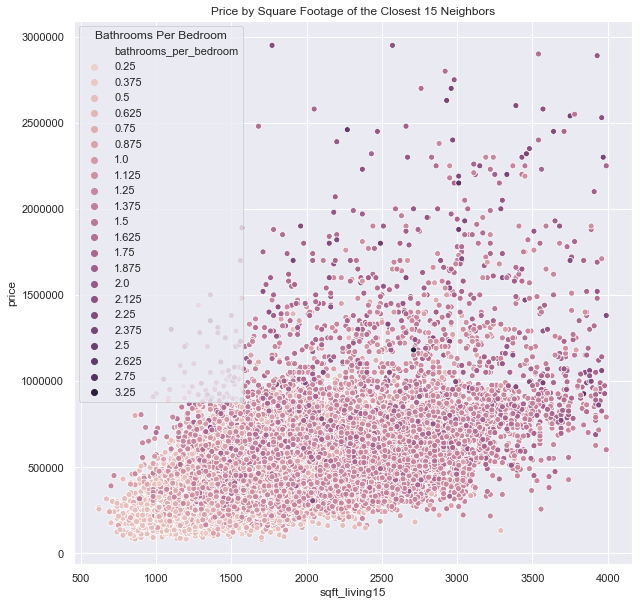

In [79]:
fig25 = plt.figure(figsize=(10,10))
ax1 = fig25.add_subplot(111)
visual4 = kc_housing_mod_7.loc[kc_housing_mod_7['price'] < 3000000]
ax1 = sns.scatterplot(x=visual3['sqft_living15'], 
                      y=visual3['price'], legend='full', hue=visual4['bathrooms_per_bedroom'])
ax1.set_title('Price by Square Footage of the Closest 15 Neighbors')
ax1.legend(title='Bathrooms Per Bedroom', loc='upper left')
fig25.savefig('Price by Square Footage of the Closest 15 Neighbors Bathrooms per Bedroom.png')

In [80]:
# which variables are the best predictors
# from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

kc_housing_mod_7_adj = kc_housing_mod_7.drop(labels='yr_built', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='zipcode', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='bedrooms', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='bathrooms', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='waterfront', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='yr_renovated', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='view', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='condition', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='grade', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='sqft_basement', axis=1)
kc_housing_mod_7_adj = kc_housing_mod_7_adj.drop(labels='price', axis=1)
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)
# lat, long, sqft_living15, bedrooms_per_sqft_lot, bathrooms_per_bedroom

[ True  True False  True False False  True  True]
Index(['lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15',
       'lot_per_living15', 'bedrooms_per_sqft_lot', 'bathrooms_per_bedroom'],
      dtype='object')


In [81]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

[ True  True False  True False False False  True]
Index(['lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15',
       'lot_per_living15', 'bedrooms_per_sqft_lot', 'bathrooms_per_bedroom'],
      dtype='object')


In [82]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 3)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

[ True  True False False False False False  True]
Index(['lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15',
       'lot_per_living15', 'bedrooms_per_sqft_lot', 'bathrooms_per_bedroom'],
      dtype='object')


In [83]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

[ True False False False False False False  True]
Index(['lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15',
       'lot_per_living15', 'bedrooms_per_sqft_lot', 'bathrooms_per_bedroom'],
      dtype='object')


In [84]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 1)
selector = selector.fit(kc_housing_mod_7_adj, kc_housing_mod_7['price'])
print(selector.support_)
print(kc_housing_mod_7_adj.columns)

[ True False False False False False False False]
Index(['lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15',
       'lot_per_living15', 'bedrooms_per_sqft_lot', 'bathrooms_per_bedroom'],
      dtype='object')


## Interpret Model

What does any of this mean?
The biggest indicator of price is how big your neighbor's houses are. The second is where your latitude is located. The third biggest indicator of price is your longitude. These are not factors that can easily be changed by a home seller; however, there is hope. The number of bathrooms per bedroom is able to influence price, and this is a change that a home seller could make to increase the value of the home. This model runs with an adjusted r-squared value of 0.825. 

## Evaluation of Model

In [85]:
# use test data set here
y = kc_housing_mod_7['price']
X = kc_housing_mod_7_adj
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [86]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

13602 4534 13602 4534


In [87]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [88]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [89]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 43155271498.37954
Test Mean Squarred Error: 46075806198.05765


In [90]:
percentage = mse_train / mse_test
percentage

0.9366145719268777

This train test split shows that the model is effective. The error is similar, within about 5% of each other.

## Cross Validation of Model

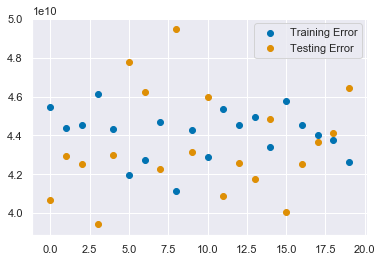

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
print(cv_5_results)
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
print(cv_10_results)
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))
print(cv_20_results)

-44258096404.74126
-44238133431.2151
-44075116782.515366


# Implementation of Model

In [97]:
def current_sell_price():
    x = int(xbath) / int(xbed)
    m = 201900
    y_current = (m * x)
    return (y_current)
xbath = input('How many bathrooms do you currently have? ')
xbed = input('How many bedrooms do you currently have? ')

How many bathrooms do you currently have? 2
How many bedrooms do you currently have? 2


In [98]:
current_sell_price()

201900.0

In [99]:
def projected_sell_price():
    x_proj = int(xbath1) / int(xbed1)
    m = 201900
    y_projected = (m * x_proj)
    return(y_projected)
xbath1 = input('How many bathrooms would you like to have? ')
xbed1 = input('How many bedrooms would you like to have? ')

How many bathrooms would you like to have? 3
How many bedrooms would you like to have? 2


In [100]:
projected_sell_price()

302850.0

In [101]:
difference = projected_sell_price() - current_sell_price()
difference

100950.0

From this model, if you increase a 2 bath, 2 bed home to a 3 bath, 2 bed home, that will increase the selling value of the home by $100,950. So plan to renovate for less than that!

## Future Work

Work with location data to determine sell information.